# Plotting

This jupyter notebook has been made with a goal to practice plotting:
* histograms
* kernel density estimation(kde)
* boxplot
* scatter plot
* heatmap
* catplot

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('dark_background')

from scipy.stats.kde import gaussian_kde

from pandas.plotting import scatter_matrix

<ipython-input-3-39369192fa2f>:8: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.kde import gaussian_kde


In [ ]:
! pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.5 MB/s eta 0:00:00


In [ ]:
import phik

## DF_1

In [1]:
! gdown --id 1LSwTS4LzbGSaPyV_mmEHfqD2yCY5haR7

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LSwTS4LzbGSaPyV_mmEHfqD2yCY5haR7
To: /content/penguins_lter.csv
100% 50.9k/50.9k [00:00<00:00, 43.3MB/s]


In [4]:
df=pd.read_csv('/content/penguins_lter.csv')

In [5]:
df

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [ ]:
df.describe(include='all')

studyName  Sample Number                              Species  Region  \
count        344     344.000000                                  344     344   
unique         3            NaN                                    3       1   
top      PAL0910            NaN  Adelie Penguin (Pygoscelis adeliae)  Anvers   
freq         120            NaN                                  152     344   
mean         NaN      63.151163                                  NaN     NaN   
std          NaN      40.430199                                  NaN     NaN   
min          NaN       1.000000                                  NaN     NaN   
25%          NaN      29.000000                                  NaN     NaN   
50%          NaN      58.000000                                  NaN     NaN   
75%          NaN      95.250000                                  NaN     NaN   
max          NaN     152.000000                                  NaN     NaN   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
count      344                 344           344               344       344   
unique       3                   1           190                 2        50   
top     Biscoe  Adult, 1 Egg Stage         N61A2               Yes  11/27/07   
freq       168                 344             3               308        18   
mean       NaN                 NaN           NaN               NaN       NaN   
std        NaN                 NaN           NaN               NaN       NaN   
min        NaN                 NaN           NaN               NaN       NaN   
25%        NaN                 NaN           NaN               NaN       NaN   
50%        NaN                 NaN           NaN               NaN       NaN   
75%        NaN                 NaN           NaN               NaN       NaN   
max        NaN                 NaN           NaN               NaN       NaN   

        Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count           342.000000         342.000000           342.000000   
unique                 NaN                NaN                  NaN   
top                    NaN                NaN                  NaN   
freq                   NaN                NaN                  NaN   
mean             43.921930          17.151170           200.915205   
std               5.459584           1.974793            14.061714   
min              32.100000          13.100000           172.000000   
25%              39.225000          15.600000           190.000000   
50%              44.450000          17.300000           197.000000   
75%              48.500000          18.700000           213.000000   
max              59.600000          21.500000           231.000000   

        Body Mass (g)   Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
count      342.000000   334         330.000000         331.000000   
unique            NaN     3                NaN                NaN   
top               NaN  MALE                NaN                NaN   
freq              NaN   168                NaN                NaN   
mean      4201.754386   NaN           8.733382         -25.686292   
std        801.954536   NaN           0.551770           0.793961   
min       2700.000000   NaN           7.632200         -27.018540   
25%       3550.000000   NaN           8.299890         -26.320305   
50%       4050.000000   NaN           8.652405         -25.833520   
75%       4750.000000   NaN           9.172123         -25.062050   
max       6300.000000   NaN          10.025440         -23.787670   

                                     Comments  
count                                      26  
unique                                      7  
top     Nest never observed with full clutch.  
freq                                       13  
mean                                      NaN  
std                                       NaN  
min                                       NaN  
25%                            

### Hisogram

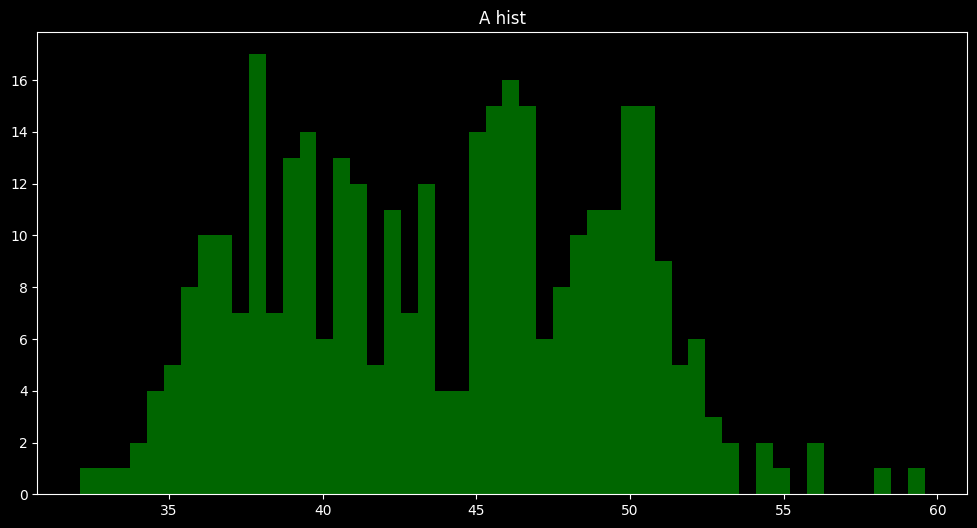

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
ax.hist(df['Culmen Length (mm)'], bins=50, alpha=0.8, color='green')
ax.set_title('A hist')
plt.show()

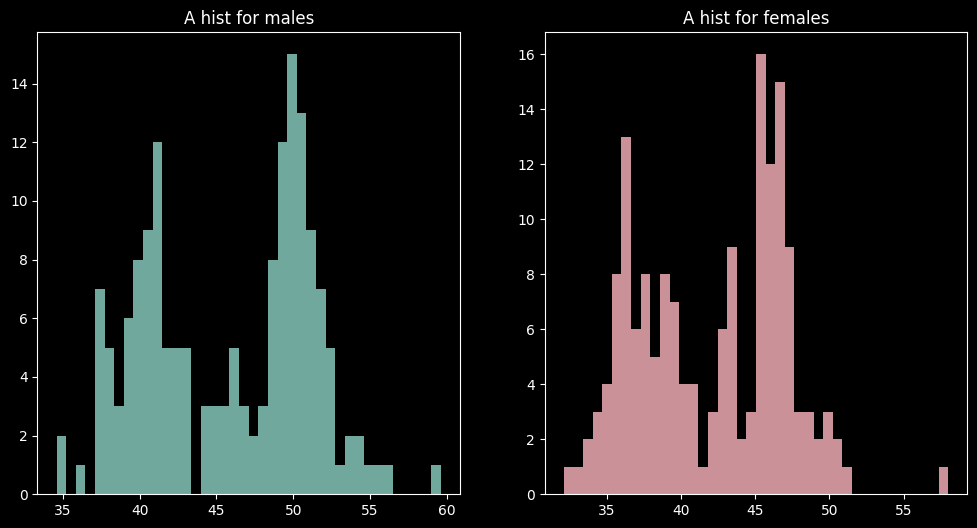

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(12,6))

axs[0].hist(df[df['Sex']=='MALE']['Culmen Length (mm)'], bins=40, alpha=0.8, label='Male')
axs[0].set_title('A hist for males')
axs[1].hist(df[df['Sex']=='FEMALE']['Culmen Length (mm)'], bins=40, alpha=0.8, color='#FFB6C1', label='Female')
axs[1].set_title('A hist for females')
plt.show()

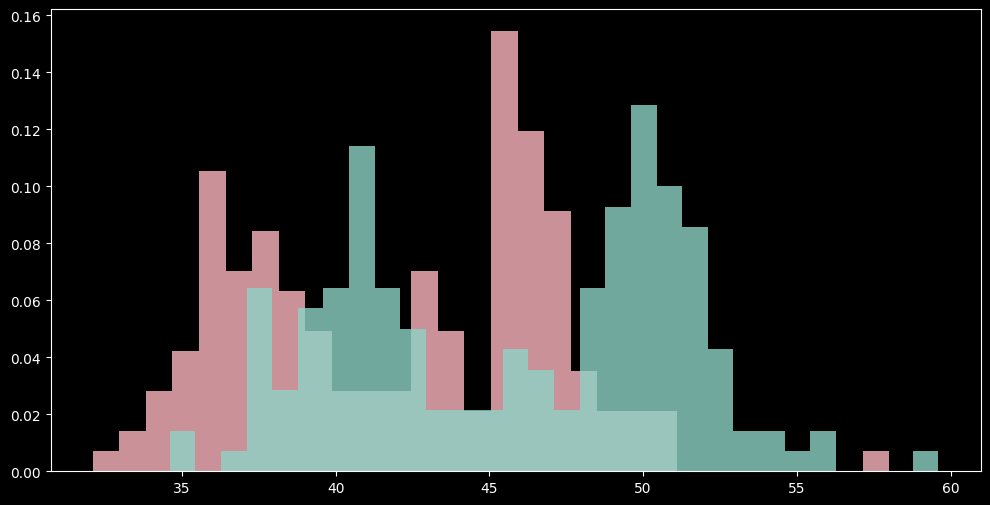

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.hist(df[df['Sex']=='FEMALE']['Culmen Length (mm)'], bins=30, alpha=0.8, color='#FFB6C1', density=True)
ax.hist(df[df['Sex']=='MALE']['Culmen Length (mm)'], bins=30, density=True, alpha=0.8)
plt.show()

### KDE

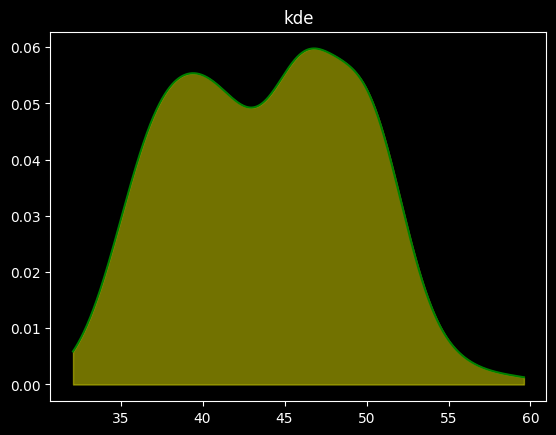

In [ ]:
kde=gaussian_kde(df['Culmen Length (mm)'].dropna(), bw_method='silverman')
fig,ax =plt.subplots()
x=np.linspace(df['Culmen Length (mm)'].min(), df['Culmen Length (mm)'].max(),1000)
ax.plot(x,kde(x), color='green')
ax.fill_between(x, kde(x), alpha=0.6, color='y')
ax.set_title('kde')
plt.show()

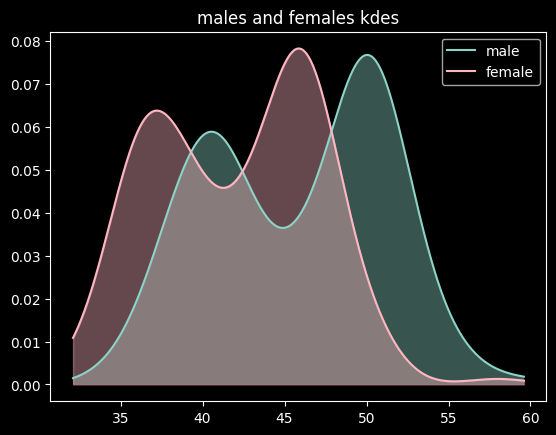

In [ ]:
male_kde=gaussian_kde(df[df['Sex']=='MALE']['Culmen Length (mm)'], bw_method='silverman')
female_kde=gaussian_kde(df[df['Sex']=='FEMALE']['Culmen Length (mm)'], bw_method='silverman')
fig, ax=plt.subplots()
ax.plot(x,male_kde(x), label='male')
ax.fill_between(x,male_kde(x), alpha=0.4)
ax.plot(x,female_kde(x), label='female', color='#FFB6C1')
ax.fill_between(x, female_kde(x), color='#FFB6C1', alpha=0.4)
ax.legend()
ax.set_title('males and females kdes')
plt.show()

### Box plot

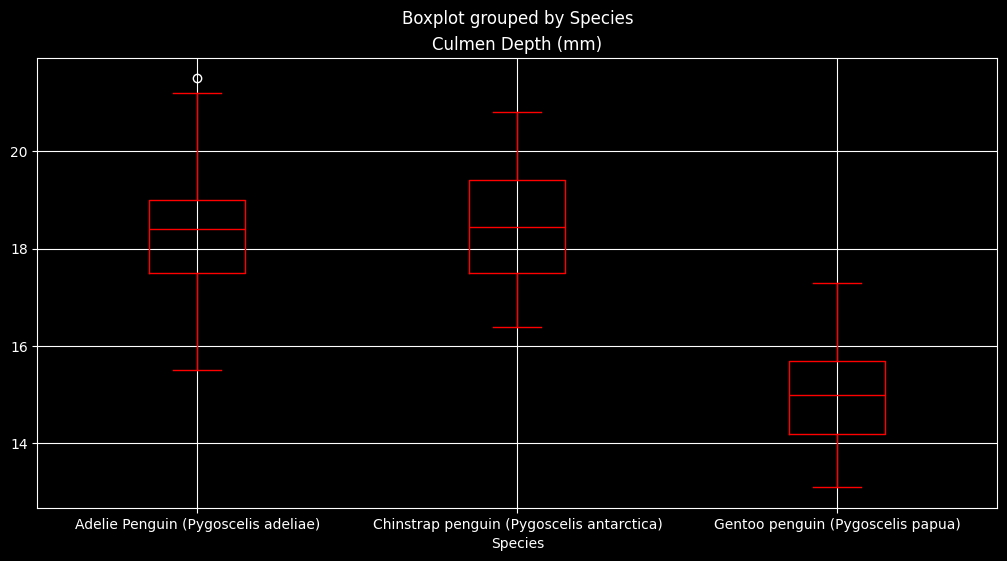

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
df.boxplot(column='Culmen Depth (mm)', by='Species', color='red', ax=ax)
plt.show()

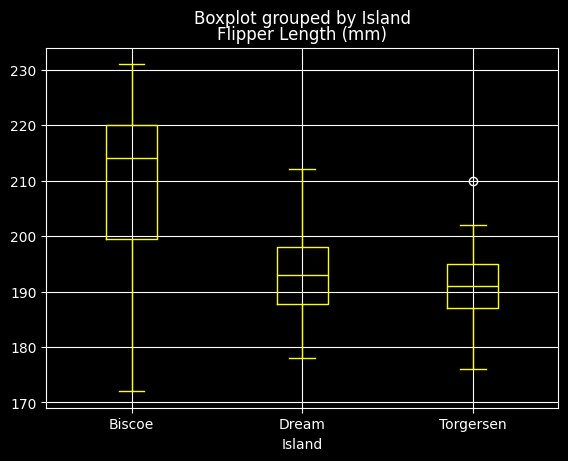

In [ ]:
fig,ax=plt.subplots()
df.boxplot(column='Flipper Length (mm)', by='Island', color='yellow', ax=ax)
plt.show()

### Scatter plot

<ipython-input-91-755d3ac8825c>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, diagonal='kde', c=df_for_scatter['Sex'].replace(colors), ax=ax,)


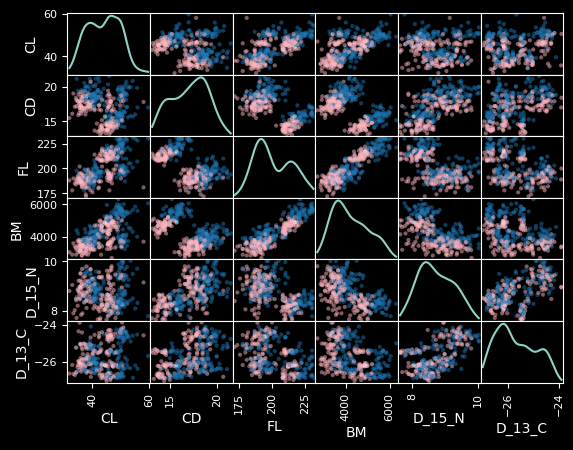

In [ ]:
fig, ax=plt.subplots()
colors={'MALE':'#1f77b4', 'FEMALE':'#FFB6C1', '.':'white'}
df_for_scatter=df[['Sex','Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].dropna(how='any', axis=0)
df_for_scatter.columns=['Sex','CL','CD','FL','BM','D_15_N','D_13_C']
scatter_matrix(df_for_scatter, diagonal='kde', c=df_for_scatter['Sex'].replace(colors), ax=ax,)
plt.show()

### Heattmap

In [ ]:
df[df['Sex']!='.'].pivot_table(index='Sex', columns='Island', values='Delta 13 C (o/oo)', aggfunc=['mean'])

mean                      
Island     Biscoe      Dream  Torgersen
Sex                                    
FEMALE -26.121022 -25.083819 -25.738735
MALE   -26.102628 -25.049476 -25.835347

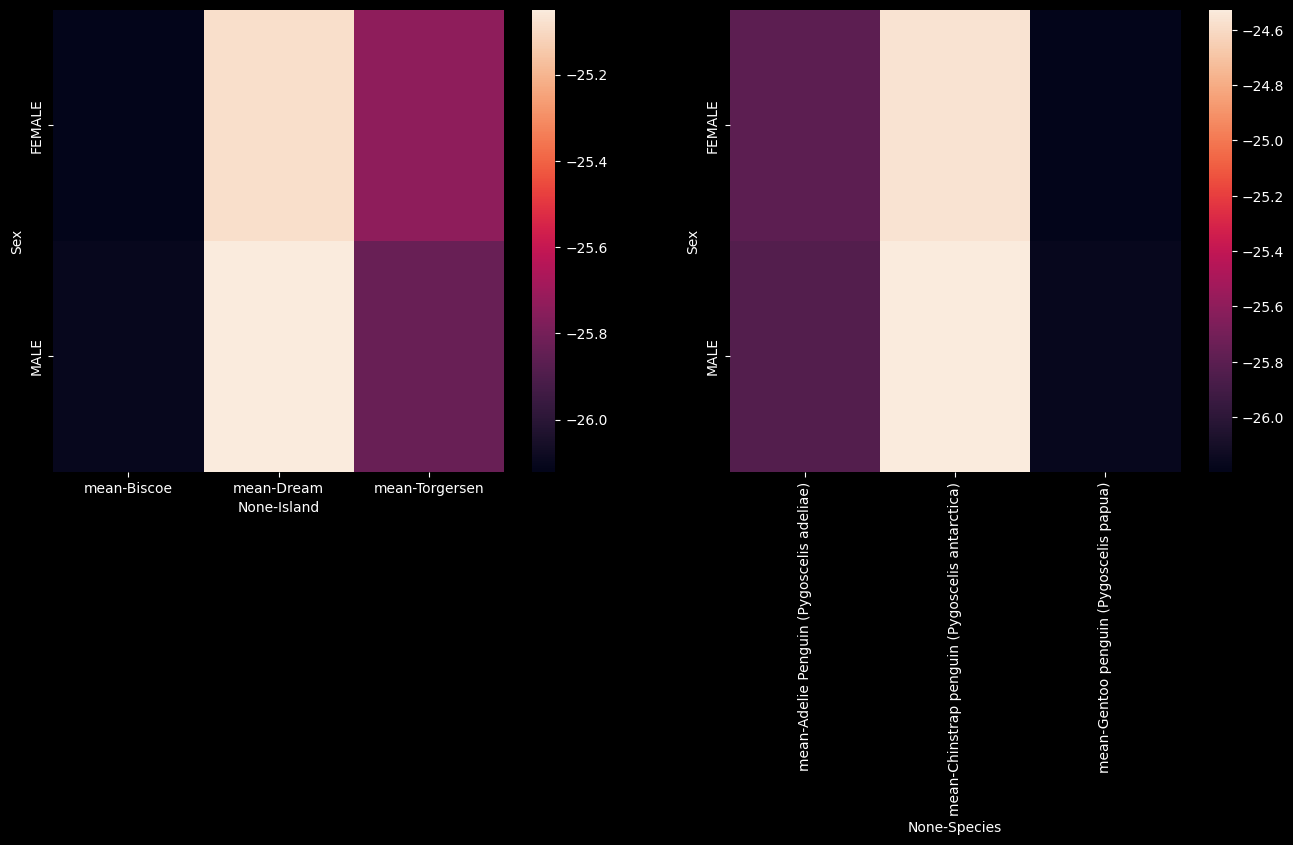

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(16,6))
sns.heatmap(df[df['Sex']!='.'].pivot_table(index='Sex', columns='Island', values='Delta 13 C (o/oo)', aggfunc=['mean']), ax=axs[0])
sns.heatmap(df[df['Sex']!='.'].pivot_table(index='Sex', columns='Species', values='Delta 13 C (o/oo)', aggfunc=['mean']), ax=axs[1])
plt.show()

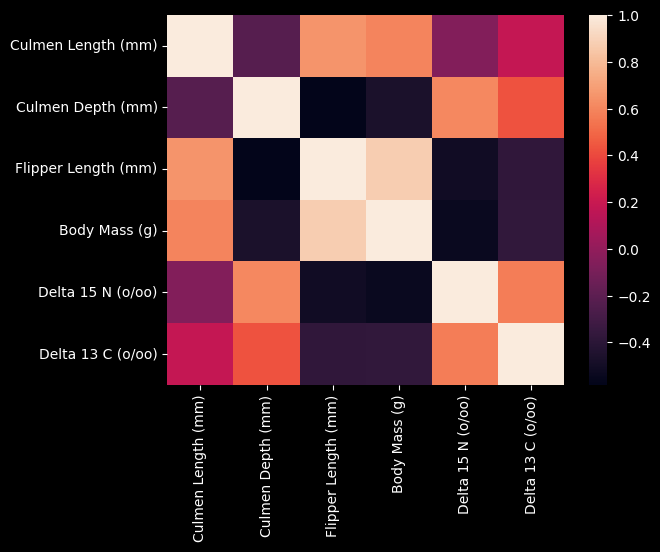

In [ ]:
df_for_corr=df[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].dropna(how='any', axis=0)
fig, ax=plt.subplots()
sns.heatmap(df_for_corr.corr(), ax=ax)
plt.show()

interval columns not set, guessing: ['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Region for analysis 1. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Stage for analysis 1. Dropping this column
  warnings.warn(


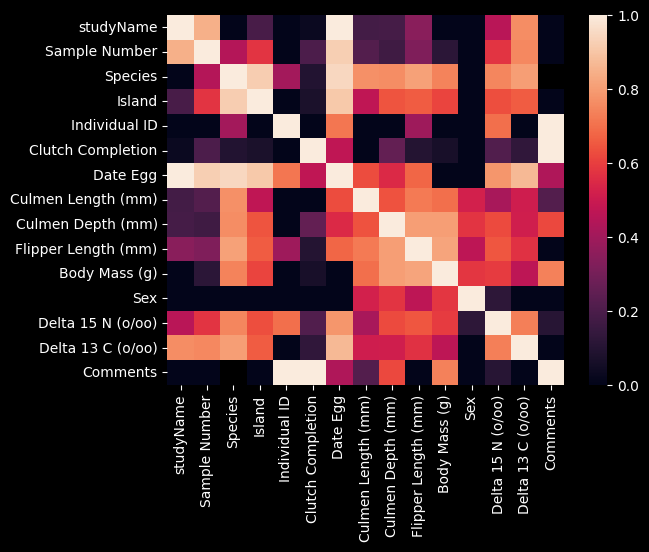

In [ ]:
fif, ax=plt.subplots()
sns.heatmap(df.phik_matrix(), ax=ax)
plt.show()

### Catplot

In [ ]:
pd.melt(df, id_vars=['Island'], value_vars=['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])

Island            variable     value
0     Torgersen  Culmen Length (mm)  39.10000
1     Torgersen  Culmen Length (mm)  39.50000
2     Torgersen  Culmen Length (mm)  40.30000
3     Torgersen  Culmen Length (mm)       NaN
4     Torgersen  Culmen Length (mm)  36.70000
...         ...                 ...       ...
2059     Biscoe   Delta 13 C (o/oo)       NaN
2060     Biscoe   Delta 13 C (o/oo) -26.13832
2061     Biscoe   Delta 13 C (o/oo) -26.04117
2062     Biscoe   Delta 13 C (o/oo) -26.11969
2063     Biscoe   Delta 13 C (o/oo) -26.15531

[2064 rows x 3 columns]

In [ ]:
df_for_cat=pd.melt(df, id_vars=['Island'], value_vars=['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])


In [ ]:
df_for_cat.groupby(['Island','variable', 'value']).size()

Island     variable             value 
Biscoe     Body Mass (g)        2850.0    2
                                2900.0    1
                                2925.0    1
                                3075.0    1
                                3150.0    2
                                         ..
Torgersen  Flipper Length (mm)  197.0     3
                                198.0     3
                                199.0     2
                                202.0     1
                                210.0     1
Length: 1295, dtype: int64

In [ ]:
df_for_cat.groupby(['Island', 'variable', 'value']).size().reset_index()

Island             variable   value  0
0        Biscoe        Body Mass (g)  2850.0  2
1        Biscoe        Body Mass (g)  2900.0  1
2        Biscoe        Body Mass (g)  2925.0  1
3        Biscoe        Body Mass (g)  3075.0  1
4        Biscoe        Body Mass (g)  3150.0  2
...         ...                  ...     ... ..
1290  Torgersen  Flipper Length (mm)   197.0  3
1291  Torgersen  Flipper Length (mm)   198.0  3
1292  Torgersen  Flipper Length (mm)   199.0  2
1293  Torgersen  Flipper Length (mm)   202.0  1
1294  Torgersen  Flipper Length (mm)   210.0  1

[1295 rows x 4 columns]

In [ ]:
df_for_cat.groupby(['Island', 'variable', 'value'], as_index=False).size()

Island             variable   value  size
0        Biscoe        Body Mass (g)  2850.0     2
1        Biscoe        Body Mass (g)  2900.0     1
2        Biscoe        Body Mass (g)  2925.0     1
3        Biscoe        Body Mass (g)  3075.0     1
4        Biscoe        Body Mass (g)  3150.0     2
...         ...                  ...     ...   ...
1290  Torgersen  Flipper Length (mm)   197.0     3
1291  Torgersen  Flipper Length (mm)   198.0     3
1292  Torgersen  Flipper Length (mm)   199.0     2
1293  Torgersen  Flipper Length (mm)   202.0     1
1294  Torgersen  Flipper Length (mm)   210.0     1

[1295 rows x 4 columns]

In [ ]:
df_for_cat.groupby(['Island', 'variable', 'value'], as_index=False).size().rename(columns={'size':'total'})

Island             variable   value  total
0        Biscoe        Body Mass (g)  2850.0      2
1        Biscoe        Body Mass (g)  2900.0      1
2        Biscoe        Body Mass (g)  2925.0      1
3        Biscoe        Body Mass (g)  3075.0      1
4        Biscoe        Body Mass (g)  3150.0      2
...         ...                  ...     ...    ...
1290  Torgersen  Flipper Length (mm)   197.0      3
1291  Torgersen  Flipper Length (mm)   198.0      3
1292  Torgersen  Flipper Length (mm)   199.0      2
1293  Torgersen  Flipper Length (mm)   202.0      1
1294  Torgersen  Flipper Length (mm)   210.0      1

[1295 rows x 4 columns]

In [ ]:
df_for_cat=df_for_cat.groupby(['Island','variable','value'], as_index=False).size().rename(columns={'size':'total'})

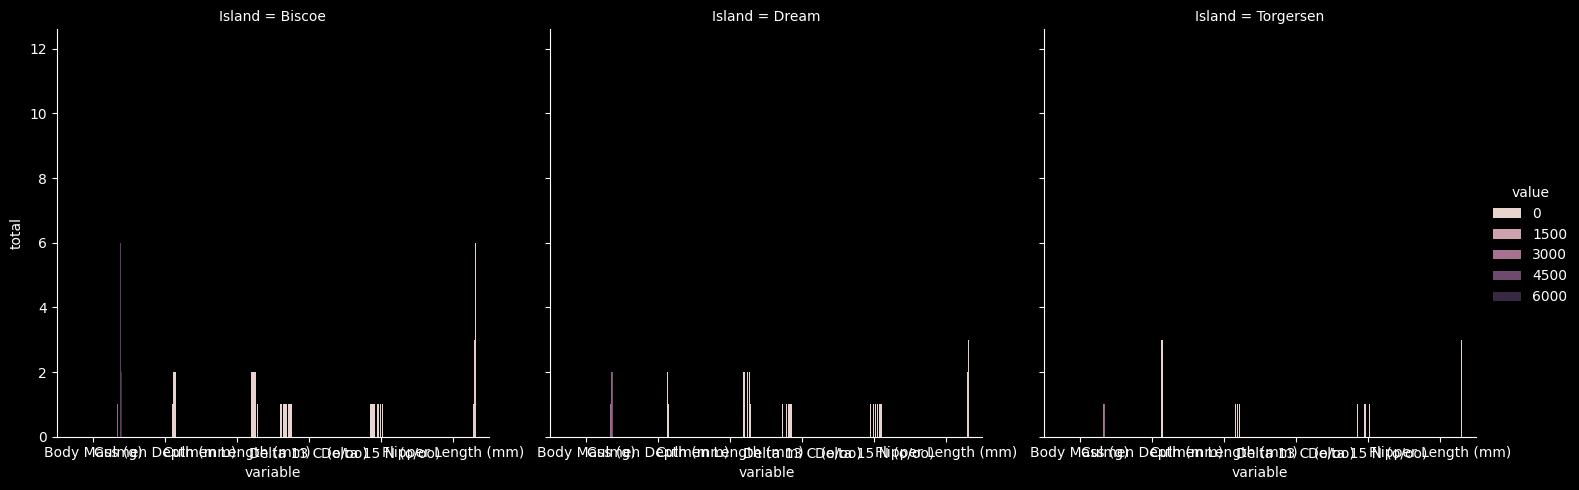

In [ ]:
#fig, ax=plt.subplots()
fig=sns.catplot(data=df_for_cat, x='variable', y='total', hue='value', col='Island', kind='bar').fig
plt.show()

## DF_2

In [ ]:
! gdown --id 1mNggpU5aLlqePglOUHgzVmzhG-zoEI2J

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mNggpU5aLlqePglOUHgzVmzhG-zoEI2J
To: /content/Titanic_train.csv
100% 61.2k/61.2k [00:00<00:00, 80.1MB/s]


In [ ]:
! gdown --id 13yTED7NrdCLYnmQOmVOUt4uJLrMILm8g

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13yTED7NrdCLYnmQOmVOUt4uJLrMILm8g
To: /content/Titanic_test.csv
100% 28.6k/28.6k [00:00<00:00, 41.7MB/s]


In [ ]:
df_train=pd.read_csv('/content/Titanic_train.csv')
df_test=pd.read_csv('/content/Titanic_test.csv')
df=pd.concat([df_test, df_train])

In [ ]:
df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
886          887       2                         Montvila, Rev. Juozas   
887          888       1                  Graham, Miss. Margaret Edith   
888          889       3      Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                         Behr, Mr. Karl Howell   
890          891       3                           Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
0      male  34.5      0      0      330911   7.8292   NaN        Q       NaN  
1    female  47.0      1      0      363272   7.0000   NaN        S       NaN  
2      male  62.0      0      0      240276   9.6875   NaN        Q       NaN  
3      male  27.0      0      0      315154   8.6625   NaN        S       NaN  
4    female  22.0      1      1     3101298  12.2875   NaN        S       NaN  
..      ...   ...    ...    ...         ...      ...   ...      ...       ...  
886    male  27.0      0      0      211536  13.0000   NaN        S       0.0  
887  female  19.0      0      0      112053  30.0000   B42        S       1.0  
888  female   NaN      1      2  W./C. 6607  23.4500   NaN        S       0.0  
889    male  26.0      0      0      111369  30.0000  C148        C       1.0  
890    male  32.0      0      0      370376   7.7500   NaN        Q       0.0  

[1309 rows x 12 columns]

In [ ]:
df.describe(include='all')

PassengerId       Pclass              Name   Sex          Age  \
count   1309.000000  1309.000000              1309  1309  1046.000000   
unique          NaN          NaN              1307     2          NaN   
top             NaN          NaN  Kelly, Mr. James  male          NaN   
freq            NaN          NaN                 2   843          NaN   
mean     655.000000     2.294882               NaN   NaN    29.881138   
std      378.020061     0.837836               NaN   NaN    14.413493   
min        1.000000     1.000000               NaN   NaN     0.170000   
25%      328.000000     2.000000               NaN   NaN    21.000000   
50%      655.000000     3.000000               NaN   NaN    28.000000   
75%      982.000000     3.000000               NaN   NaN    39.000000   
max     1309.000000     3.000000               NaN   NaN    80.000000   

              SibSp        Parch    Ticket         Fare        Cabin Embarked  \
count   1309.000000  1309.000000      1309  1308.000000          295     1307   
unique          NaN          NaN       929          NaN          186        3   
top             NaN          NaN  CA. 2343          NaN  C23 C25 C27        S   
freq            NaN          NaN        11          NaN            6      914   
mean       0.498854     0.385027       NaN    33.295479          NaN      NaN   
std        1.041658     0.865560       NaN    51.758668          NaN      NaN   
min        0.000000     0.000000       NaN     0.000000          NaN      NaN   
25%        0.000000     0.000000       NaN     7.895800          NaN      NaN   
50%        0.000000     0.000000       NaN    14.454200          NaN      NaN   
75%        1.000000     0.000000       NaN    31.275000          NaN      NaN   
max        8.000000     9.000000       NaN   512.329200          NaN      NaN   

          Survived  
count   891.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.383838  
std       0.486592  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

### Histogram

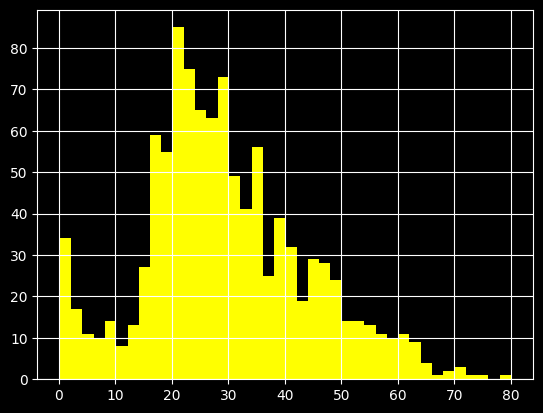

In [ ]:
fig, ax=plt.subplots()
df['Age'].hist(bins=40, color='yellow', ax=ax)
plt.show()

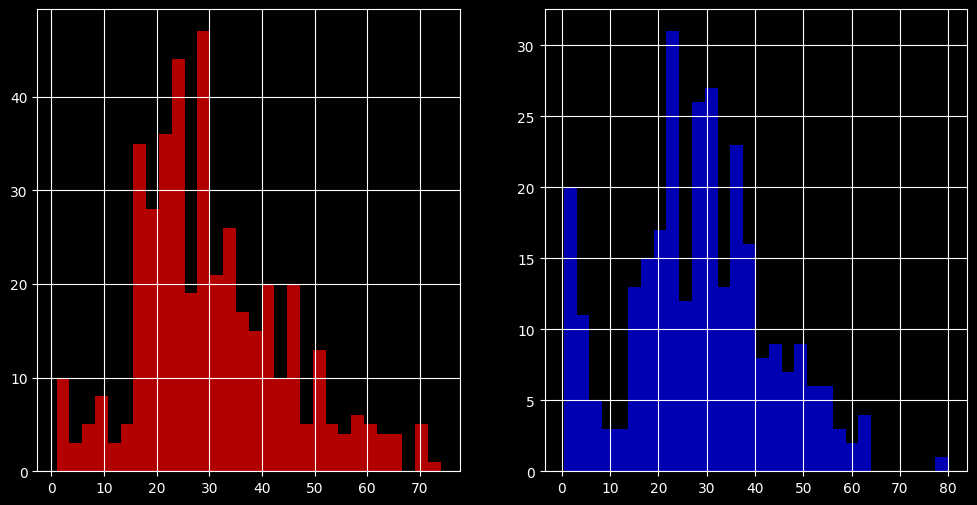

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(12,6))
df[df['Survived']==0]['Age'].hist(bins=30, color='red', alpha=0.7, ax=axs[0])
df[df['Survived']==1]['Age'].hist(bins=30, color='blue', alpha=0.7, ax=axs[1])
plt.show()

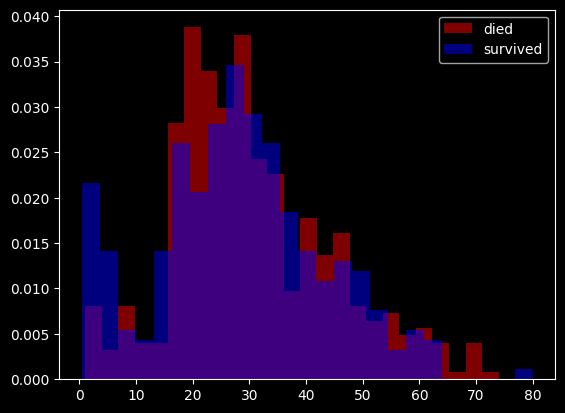

In [ ]:
fig, ax=plt.subplots()
ax.hist(df[df['Survived']==0]['Age'], bins=25, alpha=0.5, label='died', color='red', density=True)
ax.hist(df[df['Survived']==1]['Age'], bins=25, alpha=0.5,label='survived', color='blue', density=True)
ax.legend()
plt.show()

### KDE

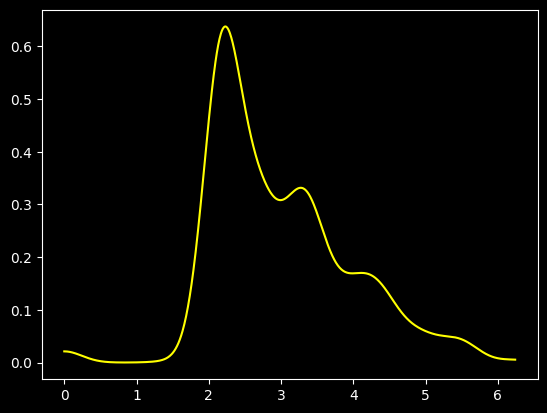

In [ ]:
fig, ax=plt.subplots()
df['log_fare']=np.log(1+df['Fare'])
kde=gaussian_kde(df['log_fare'].dropna(), bw_method='silverman')
x=np.linspace(df['log_fare'].min(), df['log_fare'].max(), 1000)
ax.plot(x, kde(x), color='yellow')
plt.show()

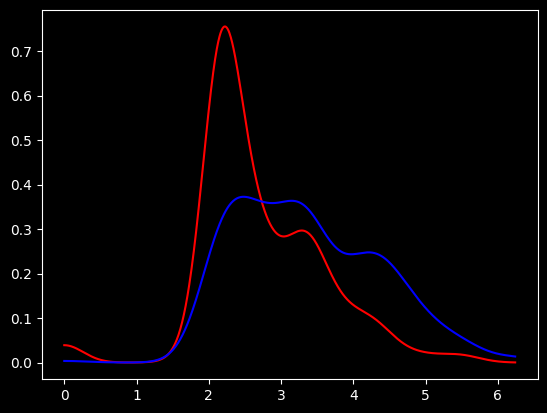

In [ ]:
fig, ax=plt.subplots()
kde_died=gaussian_kde(df[df['Survived']==0]['log_fare'].dropna(), bw_method='silverman')
kde_survived=gaussian_kde(df[df['Survived']==1]['log_fare'].dropna(), bw_method='silverman')
ax.plot(x, kde_died(x), color='red')
ax.plot(x, kde_survived(x), color='blue')
plt.show()

### Box plot

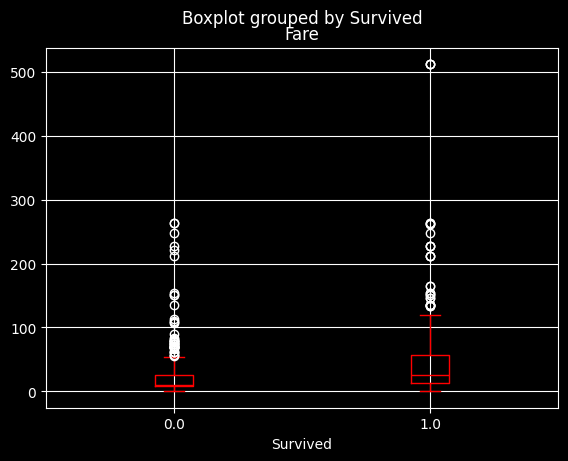

In [ ]:
fig, ax=plt.subplots()
df.boxplot(column='Fare', by='Survived', color='red', ax=ax)
plt.show()

### Scatter plot

<ipython-input-35-b8a6ddaab427>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['Survived'].replace(colors), ax=ax, diagonal='kde')


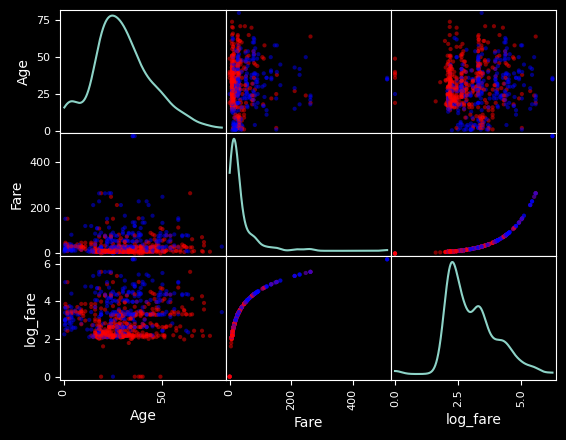

In [ ]:
fig, ax=plt.subplots()
colors={'0':'red', '1': 'blue'}
df_for_scatter=df[['Survived','Age', 'Fare', 'log_fare']].dropna(how='any', axis=0)
df_for_scatter['Survived']=df_for_scatter['Survived'].map({1: '1', 0: '0'})
scatter_matrix(df_for_scatter, c=df_for_scatter['Survived'].replace(colors), ax=ax, diagonal='kde')
plt.show()

### Heatmap

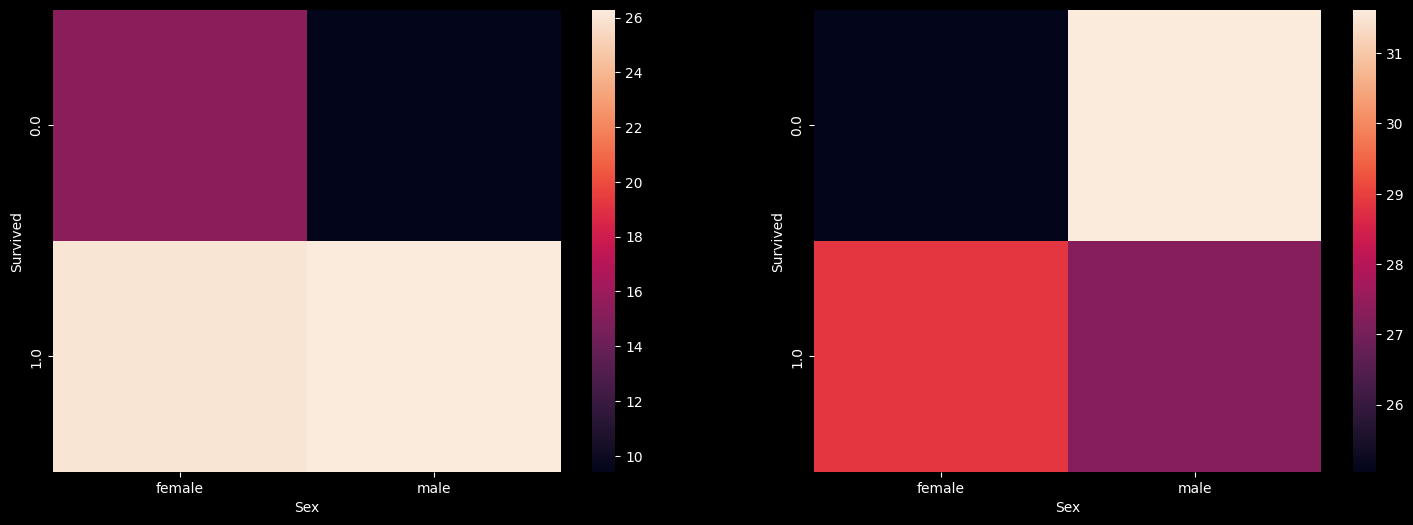

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(18,6))
sns.heatmap(df.pivot_table(index='Survived', columns='Sex', values='Fare', aggfunc='median'), ax=axs[0])
sns.heatmap(df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc='mean'), ax=axs[1])
plt.show()

interval columns not set, guessing: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Name is large: 1307. Are you sure this is not an interval variable? Analysis for pairs of variables including Name can be slow.
  warnings.warn(


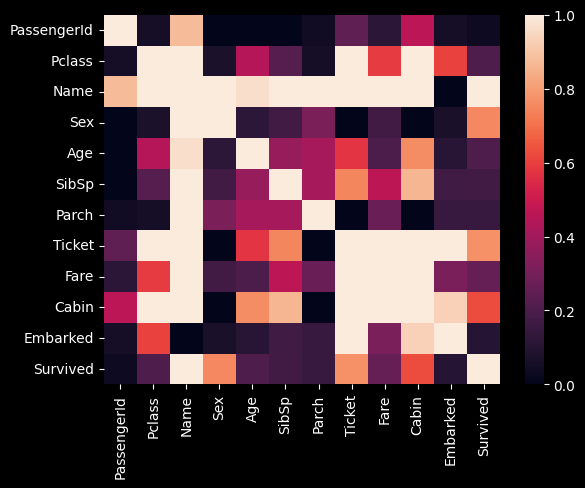

In [ ]:
fig, ax=plt.subplots()
sns.heatmap(df.phik_matrix(), ax=ax)
plt.show()

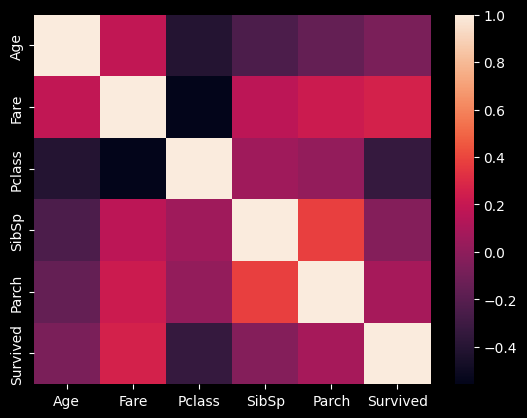

In [ ]:
fig, ax=plt.subplots()
df_for_corr=df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']]
sns.heatmap(df_for_corr.corr(), ax=ax)
plt.show()

### Cat plot

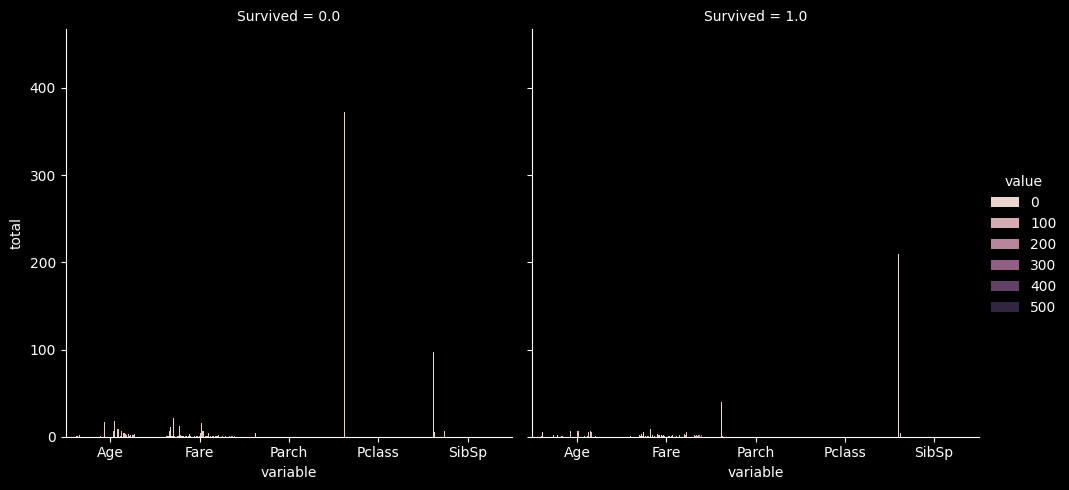

In [ ]:
df_for_cat=pd.melt(df, id_vars=['Survived'], value_vars=['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived'])
df_for_cat=df_for_cat.groupby(['Survived', 'variable', 'value'], as_index=False).size().rename(columns={'size':'total'})
fig=sns.catplot(data=df_for_cat, x='variable', y='total', hue='value', col='Survived', kind='bar').fig
plt.show()

## DF_3

In [ ]:
! gdown --id 1_RBqWgOCvx7DWGtX2jgzv60paZKj_fQA

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_RBqWgOCvx7DWGtX2jgzv60paZKj_fQA
To: /content/IRIS.csv
100% 4.62k/4.62k [00:00<00:00, 10.9MB/s]


In [ ]:
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [ ]:
df.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN

### Histograms

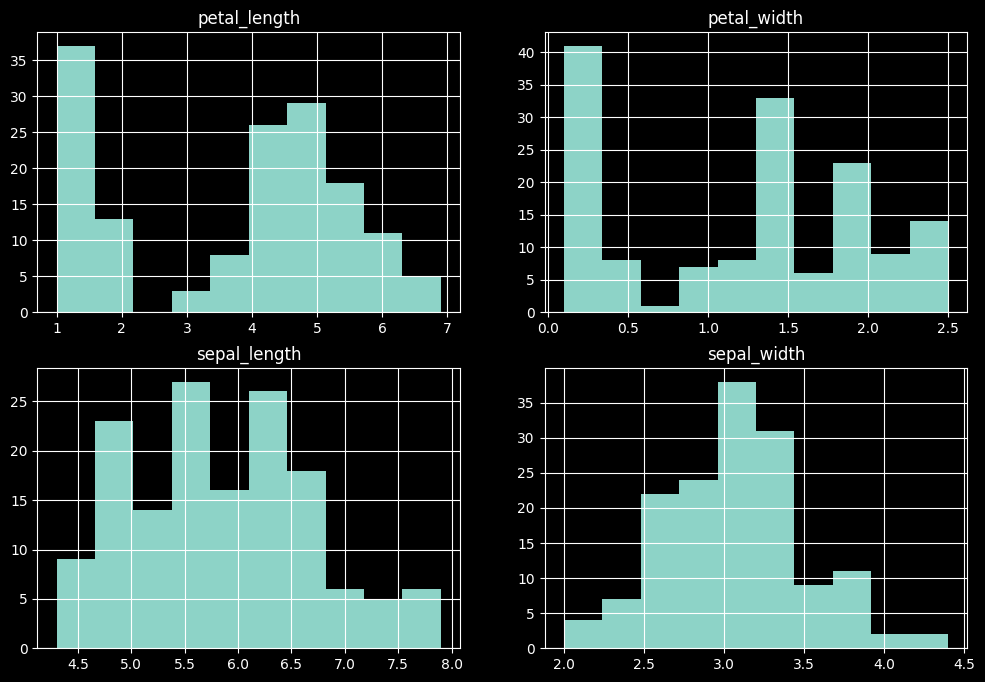

In [ ]:
fig, axs= plt.subplots(2,2, figsize=(12,8))
df['petal_length'].hist(bins=10, ax=axs[0,0])
axs[0,0].set_title('petal_length')
df['petal_width'].hist(bins=10, ax=axs[0,1])
axs[0,1].set_title('petal_width')
df['sepal_length'].hist(bins=10, ax=axs[1,0])
axs[1,0].set_title('sepal_length')
df['sepal_width'].hist(bins=10, ax=axs[1,1])
axs[1,1].set_title('sepal_width')
plt.show()

### KDE

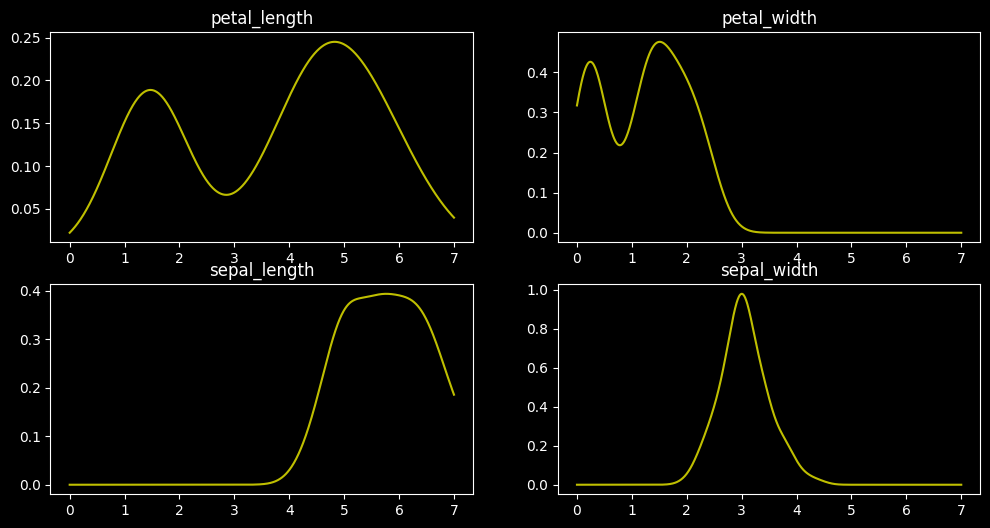

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,6))
kde_pl=gaussian_kde(df['petal_length'], bw_method='silverman')
kde_pw=gaussian_kde(df['petal_width'], bw_method='silverman')
kde_sl=gaussian_kde(df['sepal_length'], bw_method='silverman')
kde_sw=gaussian_kde(df['sepal_width'], bw_method='silverman')
x=np.linspace(0, 7, 1000)
axs[0,0].plot(x, kde_pl(x), color='y')
axs[0,0].set_title('petal_length')
axs[0,1].plot(x, kde_pw(x), color='y')
axs[0,1].set_title('petal_width')
axs[1,0].plot(x, kde_sl(x), color='y')
axs[1,0].set_title('sepal_length')
axs[1,1].plot(x, kde_sw(x), color='y')
axs[1,1].set_title('sepal_width')
plt.show()

### Box plot

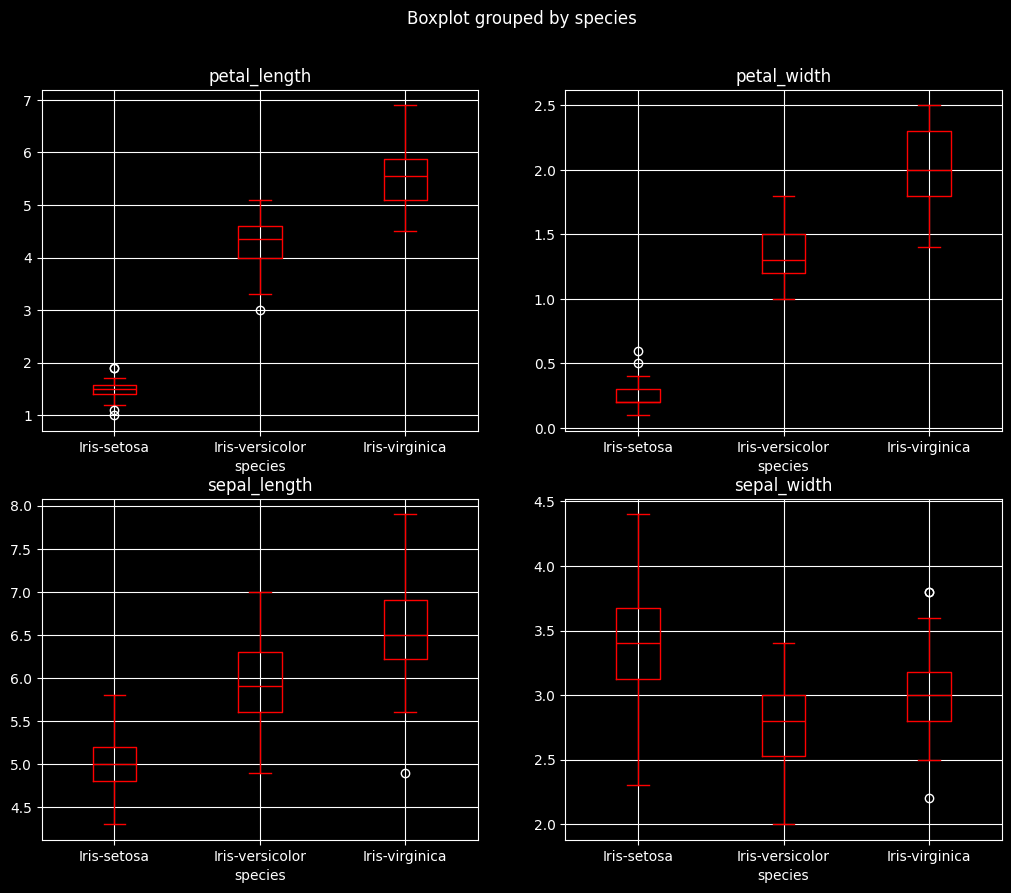

In [ ]:
fig, axs=plt.subplots(2,2, figsize=(12,10))
df.boxplot(column='petal_length', by='species', color='r', ax=axs[0,0])
axs[0,0].set_title('petal_length')
df.boxplot(column='petal_width', by='species', color='r', ax=axs[0,1])
axs[0,1].set_title('petal_width')
df.boxplot(column='sepal_length', by='species', color='r', ax=axs[1,0])
axs[1,0].set_title('sepal_length')
df.boxplot(column='sepal_width', by='species', color='r', ax=axs[1,1])
axs[1,1].set_title('sepal_width')
plt.show()

### Scatter plot

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<ipython-input-31-b7dd069bce5f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, c=df['species'].replace(colors), ax=ax, diagonal='kde')


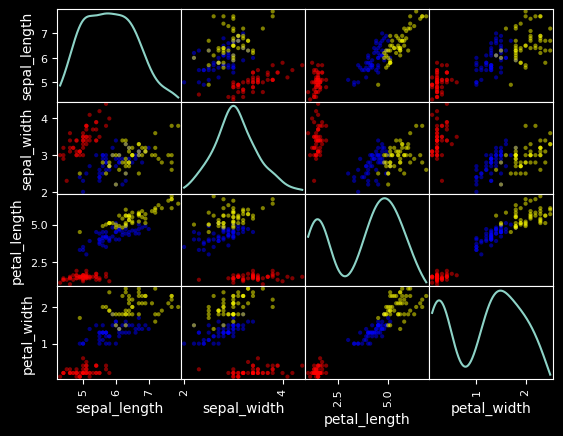

In [ ]:
fig, ax=plt.subplots()
colors={'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'yellow'}
scatter_matrix(df, c=df['species'].replace(colors), ax=ax, diagonal='kde')
plt.show()

### Heatmap

interval columns not set, guessing: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


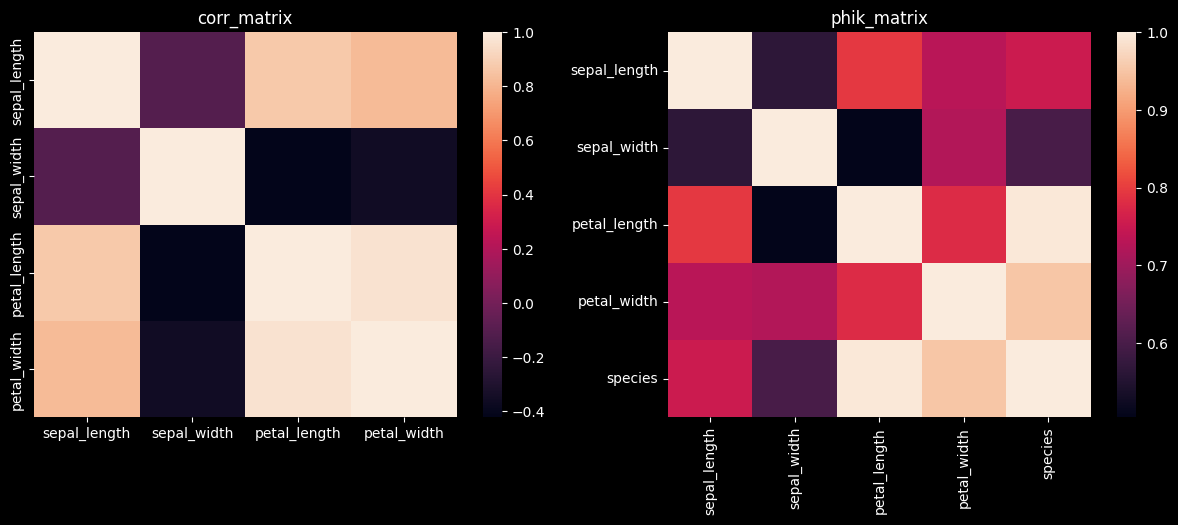

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df.drop('species', axis=1).corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

In [ ]:
df_for_cat=pd.melt(df, id_vars=['species'], value_vars=df.drop('species', axis=1))
df_for_cat=df_for_cat.groupby(['species', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})

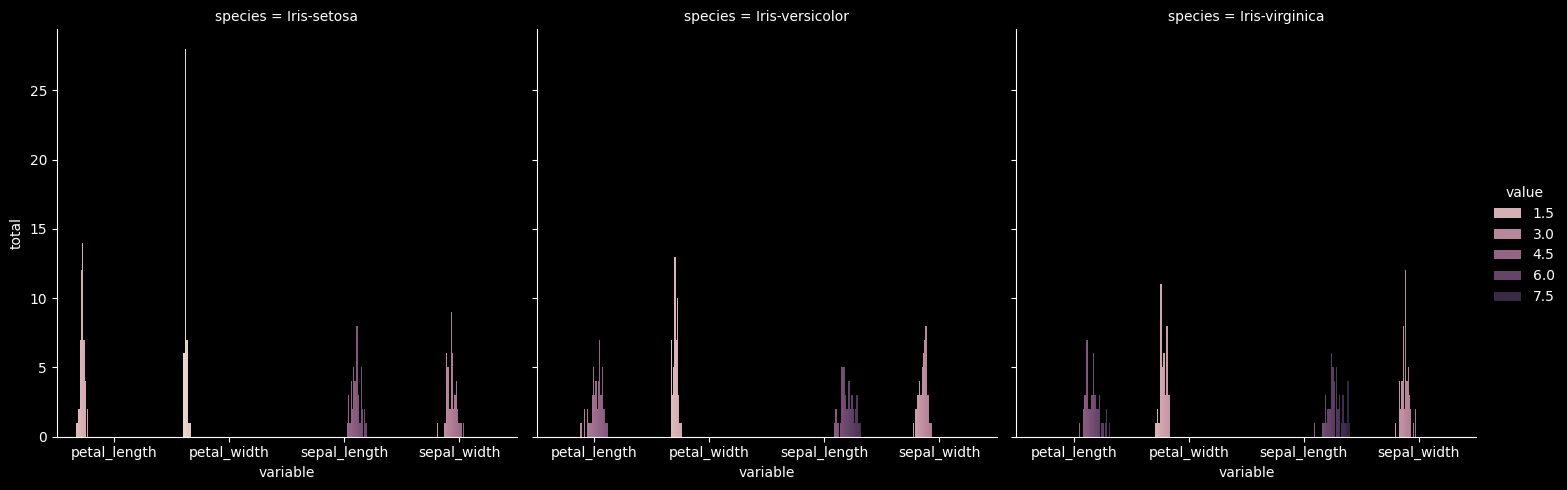

In [ ]:
fig=sns.catplot(data=df_for_cat, x='variable', y='total', hue='value', col='species', kind='bar').fig
plt.show()

## DF_4

In [ ]:
! gdown --id 1jqMYYSyP_dcwI4-P9BfBu0JzmapPG4YX

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jqMYYSyP_dcwI4-P9BfBu0JzmapPG4YX
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 51.4MB/s]


In [ ]:
df=pd.read_csv('/content/Housing.csv')

In [ ]:
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [ ]:
df.describe(include='all')

price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545             545             545   
unique        2         2        2               2               2   
top         yes        no       no              no              no   
freq        468       448      354             520             373   
mean        NaN       NaN      NaN             NaN             NaN   
std         NaN       NaN      NaN             NaN             NaN   
min         NaN       NaN      NaN             NaN             NaN   
25%         NaN       NaN      NaN             NaN             NaN   
50%         NaN       NaN      NaN             NaN             NaN   
75%         NaN       NaN      NaN             NaN             NaN   
max         NaN       NaN      NaN             NaN             NaN   

           parking prefarea furnishingstatus  
count   545.000000      545              545  
unique         NaN        2                3  
top            NaN       no   semi-furnished  
freq           NaN      417              227  
mean      0.693578      NaN              NaN  
std       0.861586      NaN              NaN  
min       0.000000      NaN              NaN  
25%       0.000000      NaN              NaN  
50%       0.000000      NaN              NaN  
75%       1.000000      NaN              NaN  
max       3.000000      NaN              NaN

### Histogram

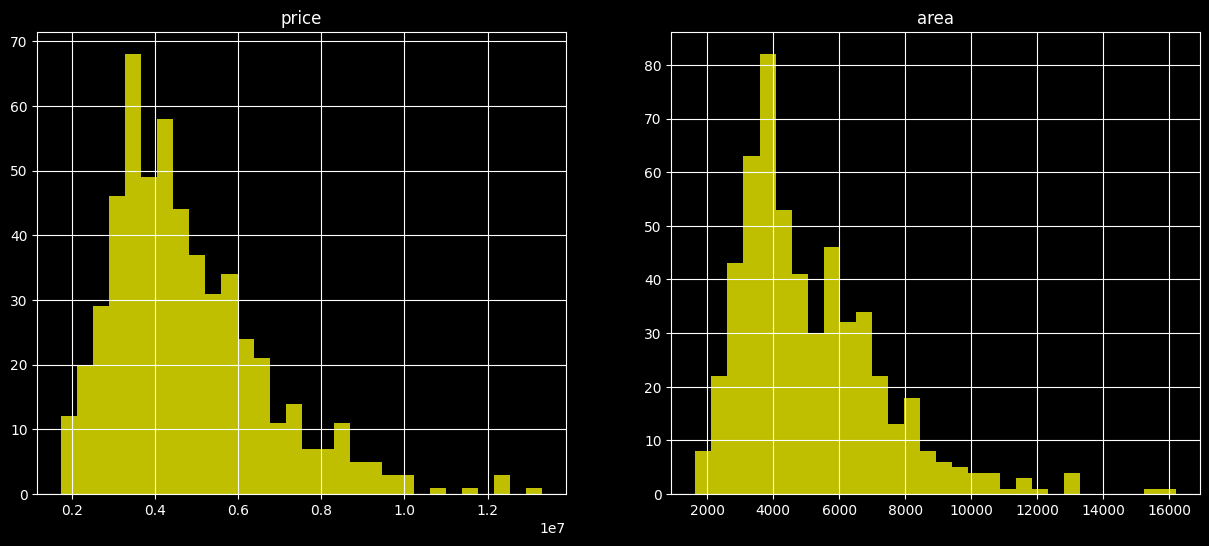

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,6))
df['price'].hist(bins=30, ax=axs[0], color='y')
axs[0].set_title('price')
df['area'].hist(bins=30, ax=axs[1], color='y')
axs[1].set_title('area')
plt.show()

### KDE

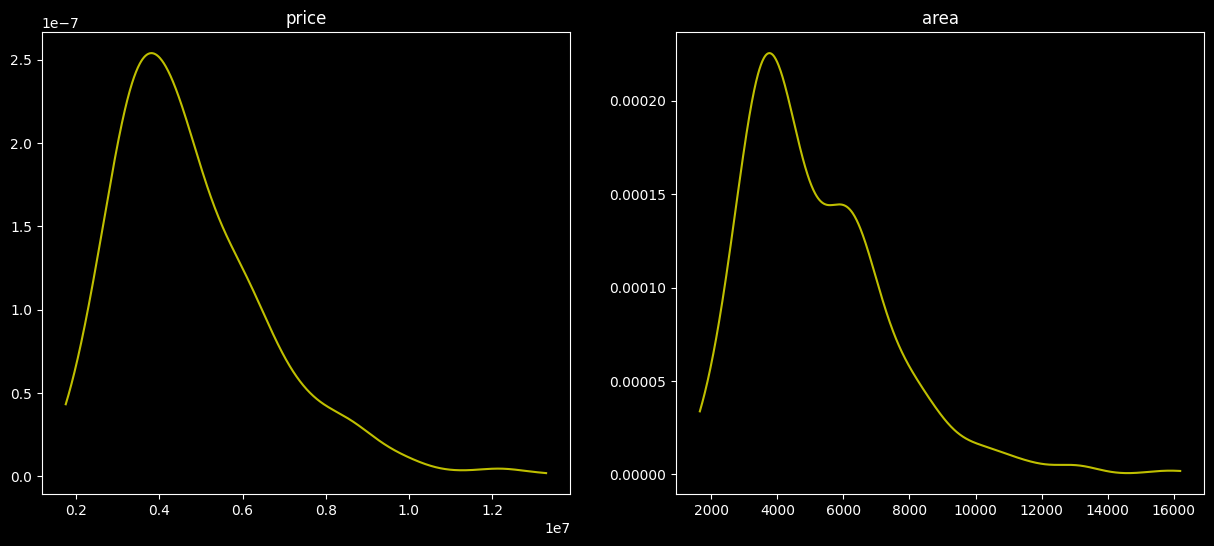

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,6))
kde_price=gaussian_kde(df['price'], bw_method='silverman')
kde_area=gaussian_kde(df['area'], bw_method='silverman')
x_price=np.linspace(df['price'].min(), df['price'].max(), 1000)
x_area=np.linspace(df['area'].min(), df['area'].max(), 1000)
axs[0].plot(x_price, kde_price(x_price), color='y')
axs[0].set_title('price')
axs[1].plot(x_area, kde_area(x_area), color='y')
axs[1].set_title('area')
plt.show()

In [ ]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

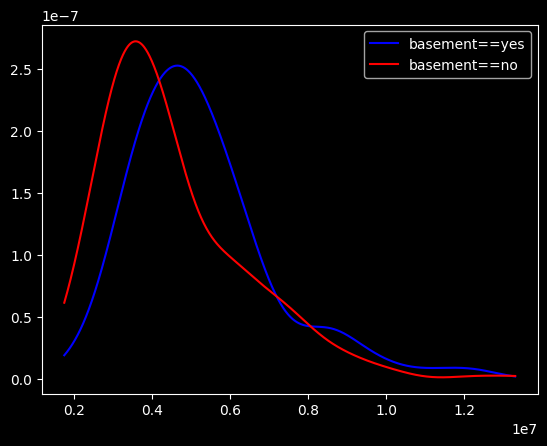

In [ ]:
kde_price_yes=gaussian_kde(df[df['basement']=='yes']['price'], bw_method='silverman')
kde_price_no=gaussian_kde(df[df['basement']=='no']['price'], bw_method='silverman')
fig, ax=plt.subplots()
ax.plot(x_price, kde_price_yes(x_price), color='blue', label='basement==yes')
ax.plot(x_price, kde_price_no(x_price), color='red', label='basement==no')
ax.legend()
plt.show()

### Box plot

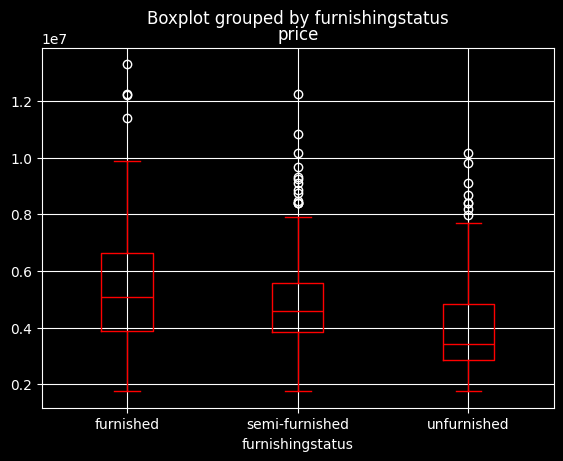

In [ ]:
fig, ax=plt.subplots()
df.boxplot(column='price', by='furnishingstatus', color='red', ax=ax)
plt.show()

### Scatter plot

In [ ]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

<ipython-input-57-71a3ba8de680>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['guestroom'].replace(color), ax=ax, diagonal='kde')


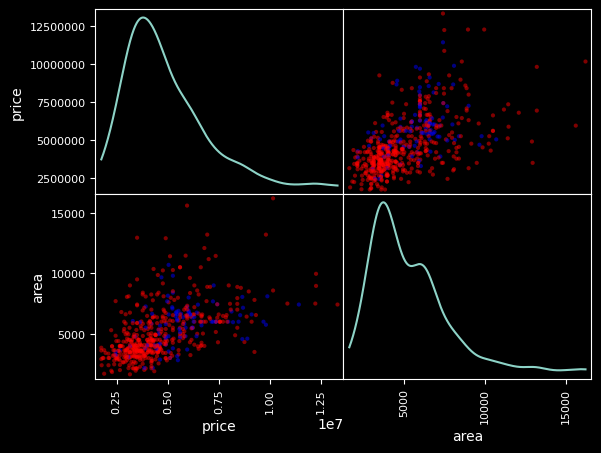

In [ ]:
df_for_scatter=df[['guestroom','price', 'area']]
color={'yes': 'blue', 'no': 'red'}
fig, ax=plt.subplots()
scatter_matrix(df_for_scatter, c=df_for_scatter['guestroom'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

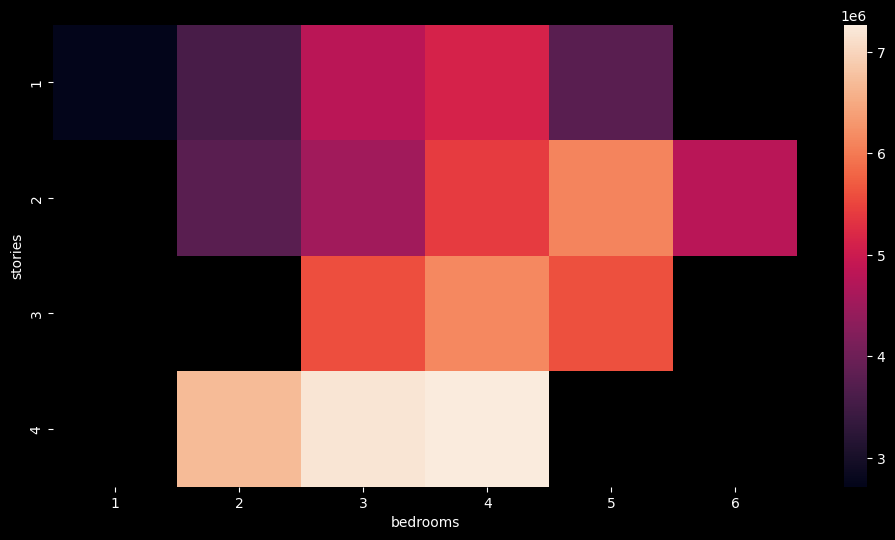

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(df.pivot_table(index='stories', columns='bedrooms', values='price'), ax=ax)
plt.show()

interval columns not set, guessing: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


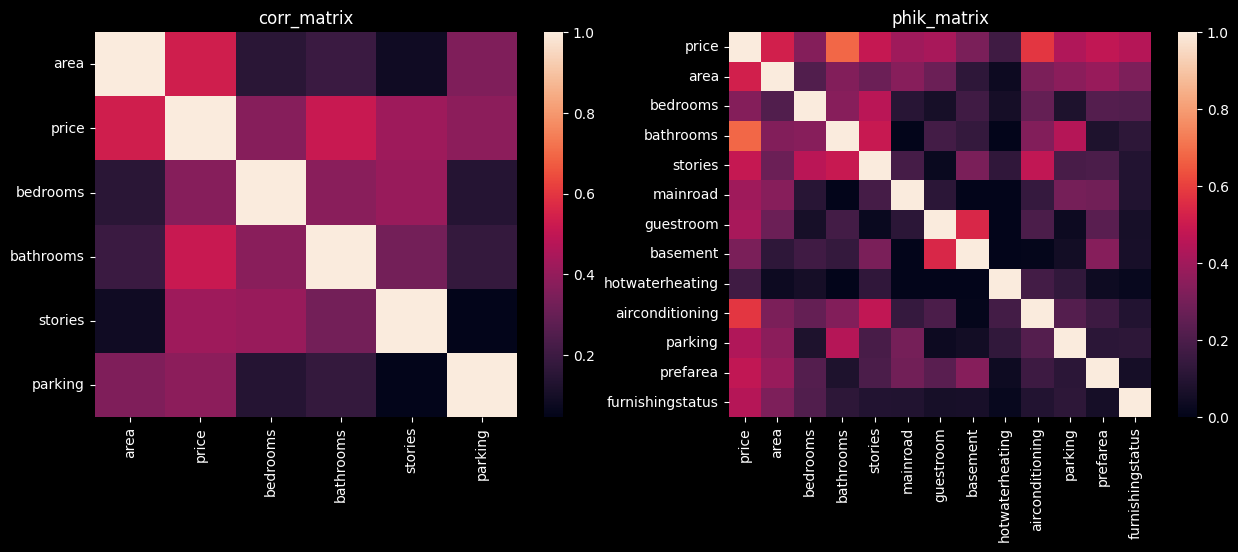

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df[['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

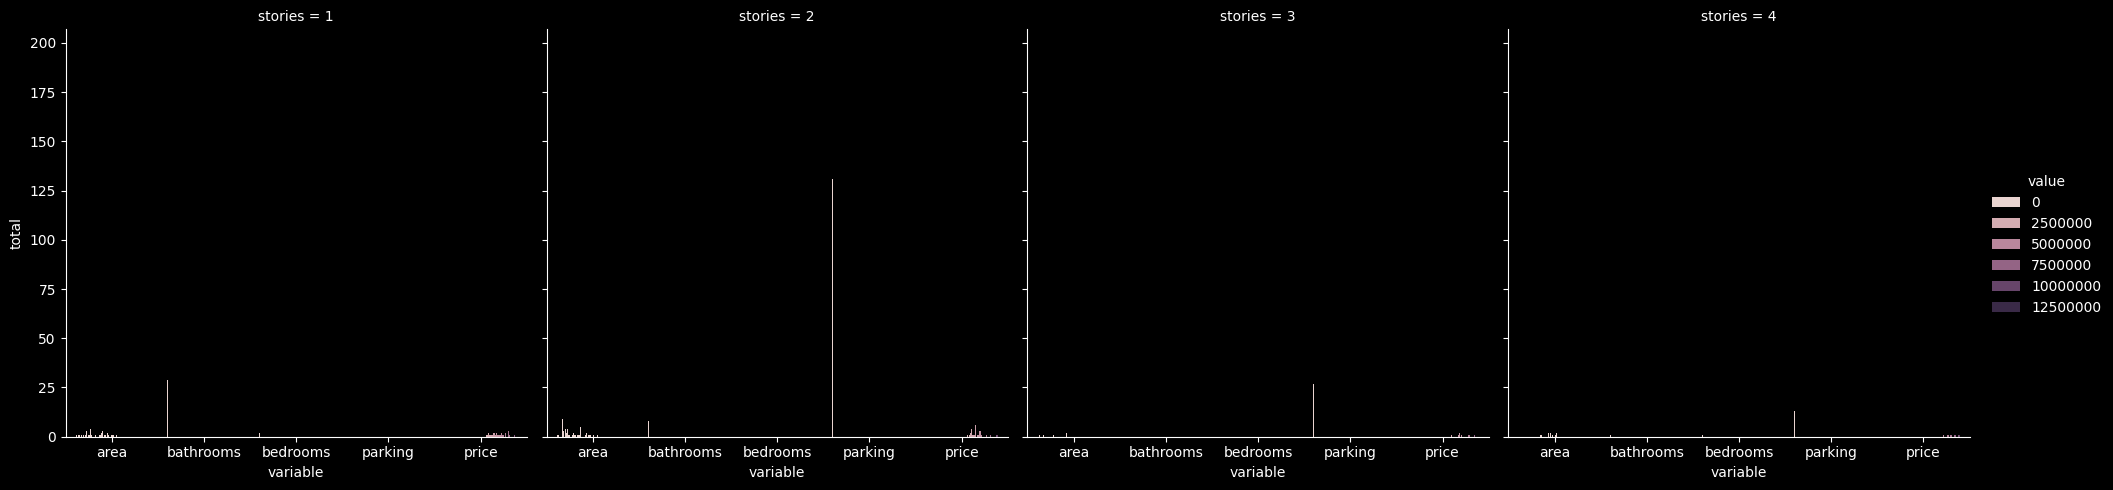

In [ ]:
df_for_cat=pd.melt(df, id_vars=['stories'], value_vars=['price', 'area', 'bedrooms', 'bathrooms', 'parking'])
df_for_cat=df_for_cat.groupby(['stories', 'variable', 'value'], as_index=False).size().rename(columns={'size':'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='stories', kind='bar').fig
plt.show()

## DF_5

In [ ]:
! gdown --id 1H3Z01c82UGXCqrIxZMe1ZEvWg3nxsWMV

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H3Z01c82UGXCqrIxZMe1ZEvWg3nxsWMV
To: /content/StudentsPerformance.csv
100% 72.0k/72.0k [00:00<00:00, 60.5MB/s]


In [ ]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [ ]:
df.describe(include='all')

gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   
mean       NaN            NaN                         NaN       NaN   
std        NaN            NaN                         NaN       NaN   
min        NaN            NaN                         NaN       NaN   
25%        NaN            NaN                         NaN       NaN   
50%        NaN            NaN                         NaN       NaN   
75%        NaN            NaN                         NaN       NaN   
max        NaN            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  
count                     1000  1000.00000    1000.000000    1000.000000  
unique                       2         NaN            NaN            NaN  
top                       none         NaN            NaN            NaN  
freq                       642         NaN            NaN            NaN  
mean                       NaN    66.08900      69.169000      68.054000  
std                        NaN    15.16308      14.600192      15.195657  
min                        NaN     0.00000      17.000000      10.000000  
25%                        NaN    57.00000      59.000000      57.750000  
50%                        NaN    66.00000      70.000000      69.000000  
75%                        NaN    77.00000      79.000000      79.000000  
max                        NaN   100.00000     100.000000     100.000000

### Histogram

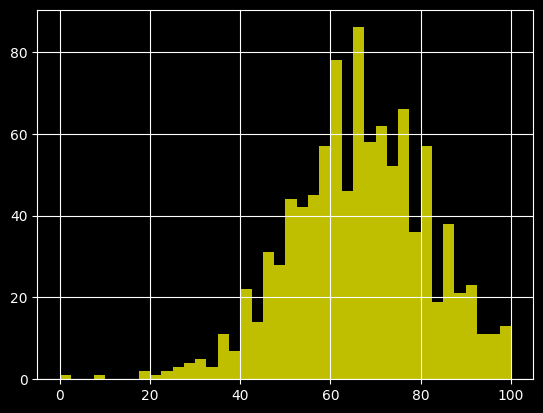

In [ ]:
fig, ax=plt.subplots()
df['math score'].hist(bins=40, color='y', ax=ax)
plt.show()

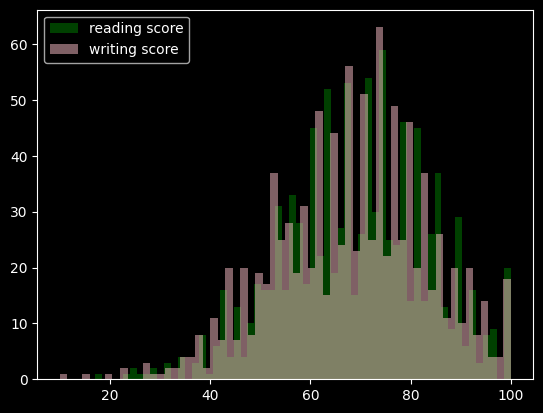

In [ ]:
fig, ax =plt.subplots()
ax.hist(df['reading score'], bins=60, color='g', alpha=0.5, label='reading score')
ax.hist(df['writing score'], bins=60, color='pink', alpha=0.5, label='writing score')
ax.legend()
plt.show()

### KDE

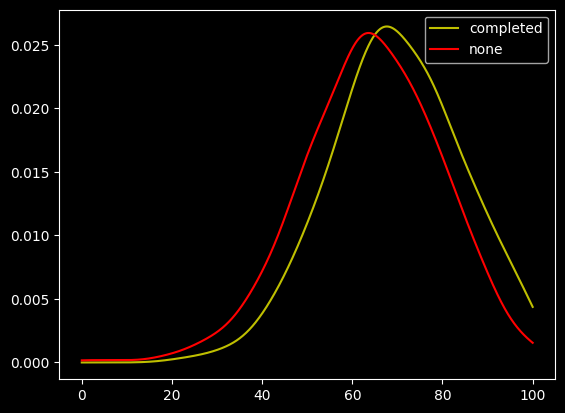

In [ ]:
kde_c=gaussian_kde(df[df['test preparation course']=='completed']['math score'], bw_method='silverman')
kde_n=gaussian_kde(df[df['test preparation course']=='none']['math score'], bw_method='silverman')
x=np.linspace(df['math score'].min(), df['math score'].max(), 1000)
fig, ax=plt.subplots()
ax.plot(x, kde_c(x), color='y', label='completed')
ax.plot(x, kde_n(x), color='r', label='none')
ax.legend()
plt.show()

### Box plot

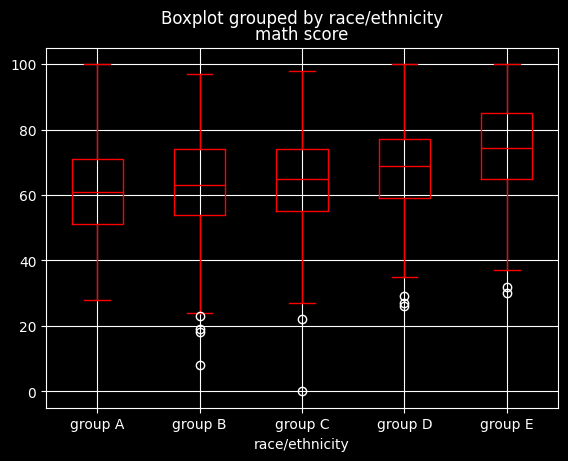

In [ ]:
fig, ax=plt.subplots()
df.boxplot(column='math score', by='race/ethnicity', color='r', ax=ax)
plt.show()

### Scatter plot

<ipython-input-80-50f547995769>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['gender'].replace(color), ax=ax, diagonal='kde')


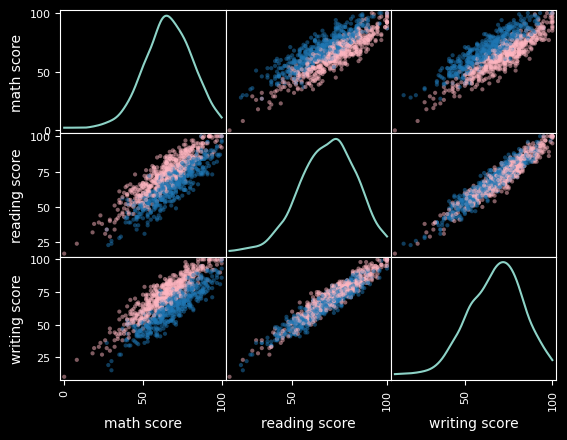

In [ ]:
fig, ax=plt.subplots()
df_for_scatter=df[['gender', 'math score', 'reading score', 'writing score']]
color={'male':'#1f77b4', 'female': '#FFB6C1'}
scatter_matrix(df_for_scatter, c=df_for_scatter['gender'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

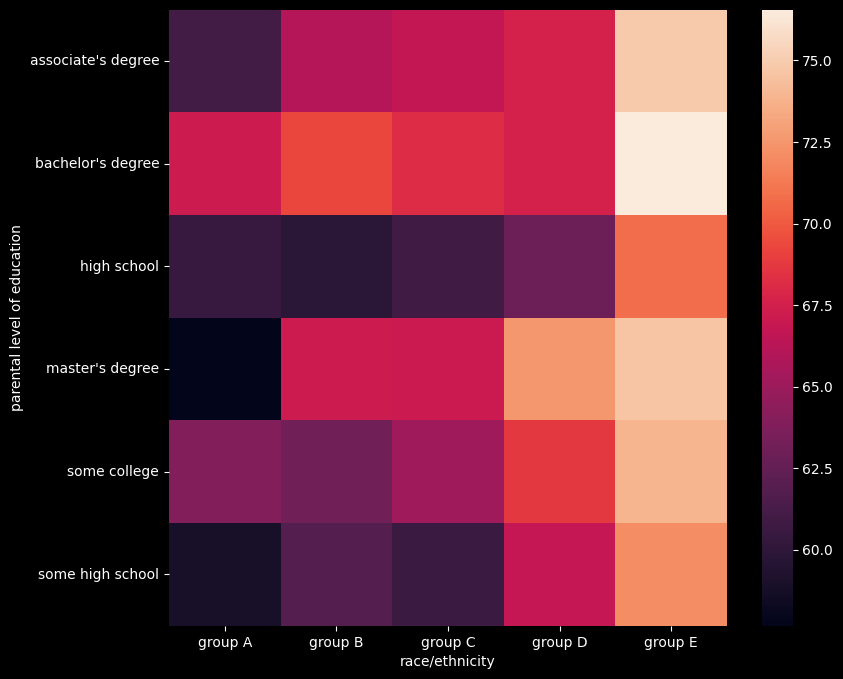

In [ ]:
fig, ax=plt.subplots(figsize=(9,8))
sns.heatmap(df.pivot_table(index='parental level of education', columns=['race/ethnicity'], values='math score', aggfunc='mean'), ax=ax)
plt.show()

interval columns not set, guessing: ['math score', 'reading score', 'writing score']


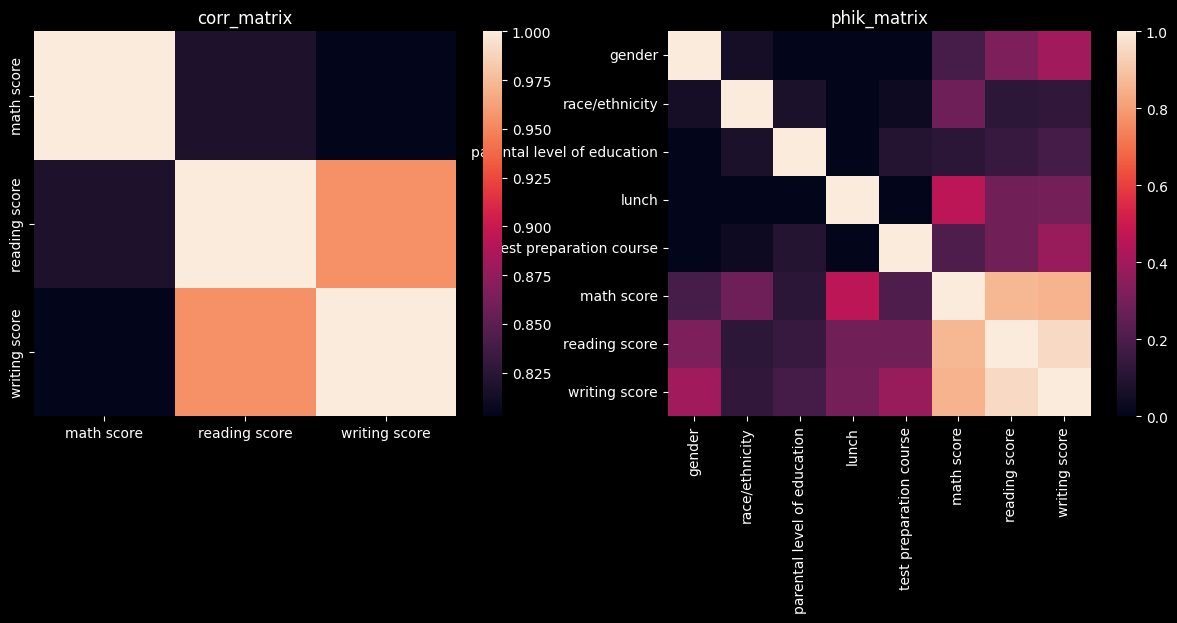

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

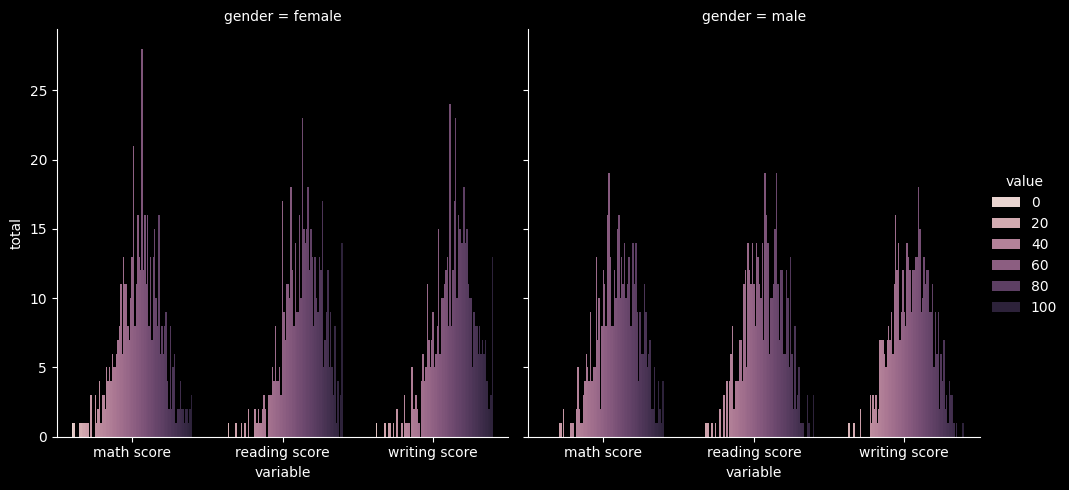

In [ ]:
df_for_cat=pd.melt(df, id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score'])
df_for_cat=df_for_cat.groupby(['gender', 'variable', 'value'], as_index=False).size().rename(columns={'size':'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='gender', kind='bar').fig
plt.show()

## DF_6

In [ ]:
! gdown --id 1ptNconLE1ADhVJ_hy_ZJrHM030-EEZxh

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ptNconLE1ADhVJ_hy_ZJrHM030-EEZxh
To: /content/Mall_Customers.csv
100% 4.29k/4.29k [00:00<00:00, 12.4MB/s]


In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [ ]:
df.describe(include='all')

CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.000000  
25%                  34.750000  
50%                  50.000000  
75%                  73.000000  
max                  99.000000

### Histogram

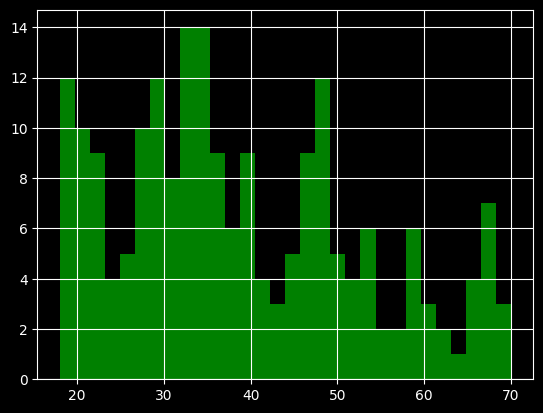

In [ ]:
fig, ax=plt.subplots()
df['Age'].hist(bins=30, color='g', ax=ax)
plt.show()

### KDE

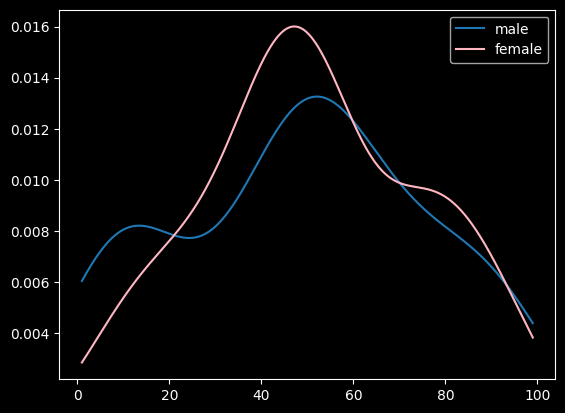

In [ ]:
fig, ax=plt.subplots()
kde_m=gaussian_kde(df[df['Genre']=='Male']['Spending Score (1-100)'], bw_method='silverman')
kde_f=gaussian_kde(df[df['Genre']=='Female']['Spending Score (1-100)'], bw_method='silverman')
x=np.linspace(df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max(), 1000)
ax.plot(x, kde_m(x), color='#1f77b4', label='male')
ax.plot(x, kde_f(x), color='#FFB6C1', label='female')
ax.legend()
plt.show()

### Box plot

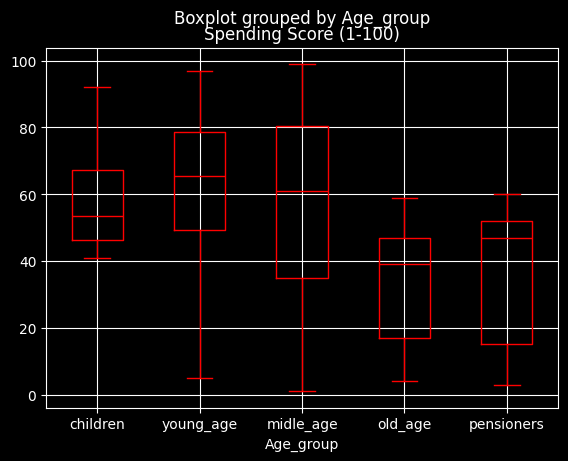

In [ ]:
fig, ax=plt.subplots()
df['Age_group']=pd.cut(df['Age'], bins=[0, 18, 30, 40, 55, 200], labels=['children', 'young_age', 'midle_age', 'old_age', 'pensioners'])
df.boxplot(column='Spending Score (1-100)', by='Age_group', color='r', ax=ax)
plt.show()

### Scatter plot

<ipython-input-98-e552df4d7cd7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df['Genre'].replace(color), ax=ax, diagonal='kde')


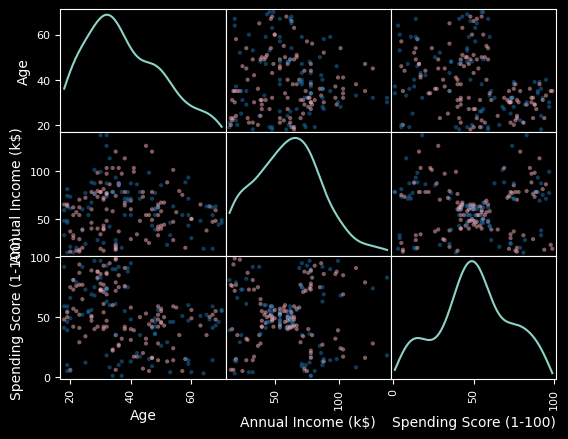

In [ ]:
df_for_scatter=df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
color={'Male': '#1f77b4', 'Female': '#FFB6C1'}
fig, ax=plt.subplots()
scatter_matrix(df_for_scatter, c=df['Genre'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

interval columns not set, guessing: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


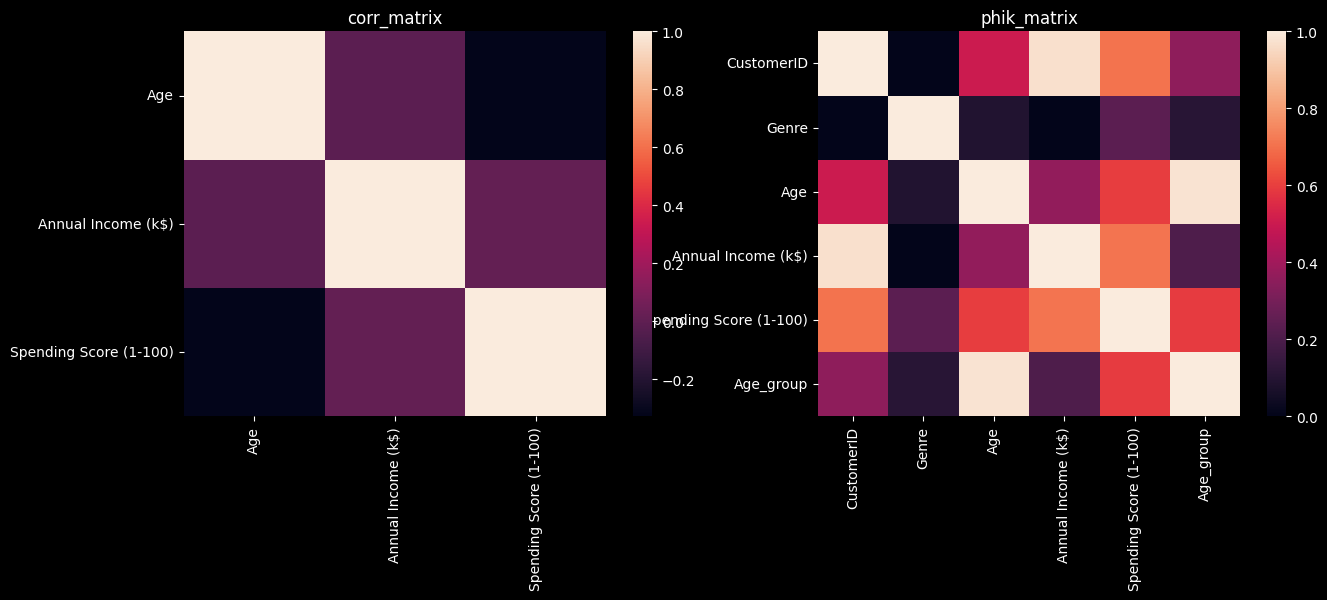

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

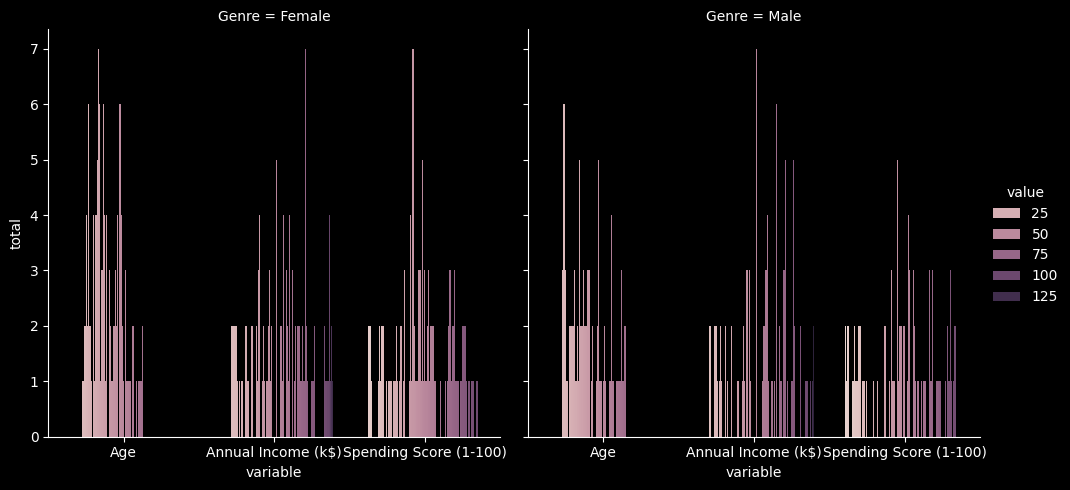

In [ ]:
df_for_cat=pd.melt(df, id_vars=['Genre'], value_vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_for_cat=df_for_cat.groupby(['Genre', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='Genre', kind='bar').fig
plt.show()

## DF_7

In [ ]:
! gdown --id 1W3OCAzE84tmXah1aueAE99v99CHCZ1I6

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W3OCAzE84tmXah1aueAE99v99CHCZ1I6
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 96.9MB/s]


In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [ ]:
df.describe(include='all')

id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110           5110        5110.000000  4909.000000   
unique            2         5              2                NaN          NaN   
top             Yes   Private          Urban                NaN          NaN   
freq           3353      2925           2596                NaN          NaN   
mean            NaN       NaN            NaN         106.147677    28.893237   
std             NaN       NaN            NaN          45.283560     7.854067   
min             NaN       NaN            NaN          55.120000    10.300000   
25%             NaN       NaN            NaN          77.245000    23.500000   
50%             NaN       NaN            NaN          91.885000    28.100000   
75%             NaN       NaN            NaN         114.090000    33.100000   
max             NaN       NaN            NaN         271.740000    97.600000   

       smoking_status       stroke  
count            5110  5110.000000  
unique              4          NaN  
top      never smoked          NaN  
freq             1892          NaN  
mean              NaN     0.048728  
std               NaN     0.215320  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

### Histogram

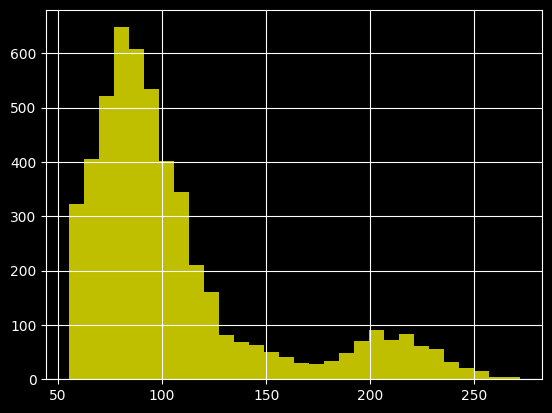

In [ ]:
fig, ax=plt.subplots()
df['avg_glucose_level'].hist(bins=30, ax=ax, color='y')
plt.show()

### KDE

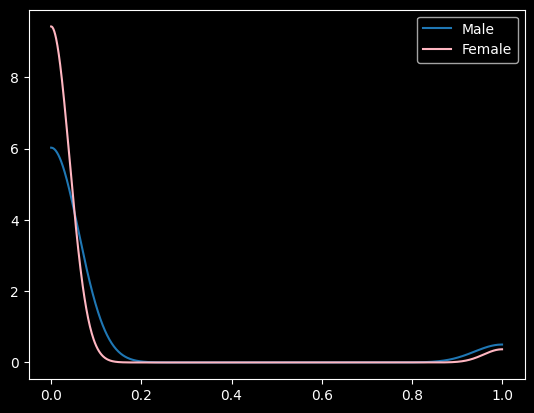

In [ ]:
kde_m=gaussian_kde(df[df['gender']=='Male']['heart_disease'], bw_method='silverman')
kde_f=gaussian_kde(df[df['gender']=='Female']['heart_disease'], bw_method='silverman')
x=np.linspace(df['heart_disease'].min(), df['heart_disease'].max(), 1000)
fig, ax=plt.subplots()
ax.plot(x, kde_m(x), color='#1f77b4', label='Male')
ax.plot(x, kde_f(x), color='#FFB6C1', label='Female')
ax.legend()
plt.show()

### Box plot

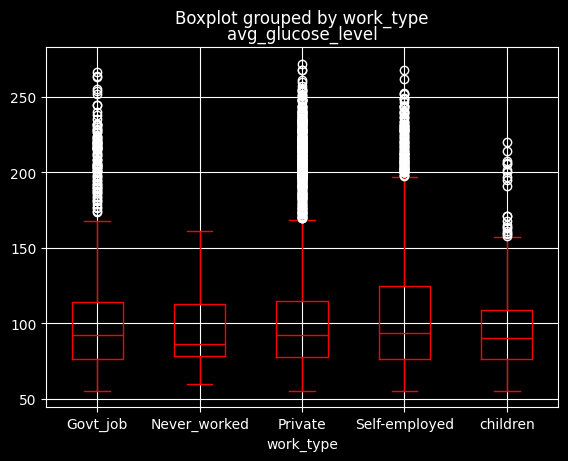

In [ ]:
fig, ax=plt.subplots()
df.boxplot(column='avg_glucose_level', by='work_type', color='r', ax=ax)
plt.show()

### Scatter plot

<ipython-input-130-c22c6b1fc949>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_scatter['heart_disease']=df_for_scatter['heart_disease'].map({0: '0', 1: '1'})
<ipython-input-130-c22c6b1fc949>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['heart_disease'].replace(color), ax=ax, diagonal='kde')


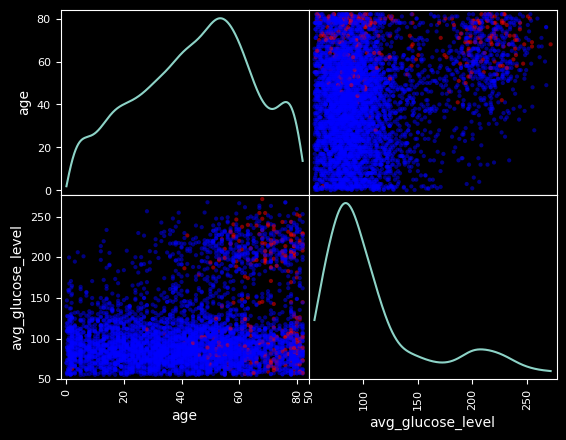

In [ ]:
df_for_scatter=df[['heart_disease','age', 'avg_glucose_level']]
df_for_scatter['heart_disease']=df_for_scatter['heart_disease'].map({0: '0', 1: '1'})
color={'0': 'blue', '1': 'red'}
fig, ax=plt.subplots()
scatter_matrix(df_for_scatter, c=df_for_scatter['heart_disease'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

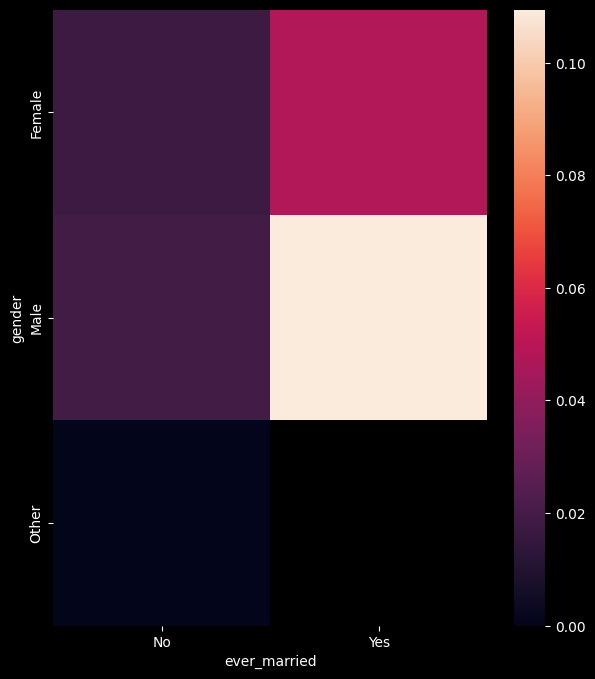

In [ ]:
fig, ax=plt.subplots(figsize=(7,8))
sns.heatmap(df.pivot_table(index='gender', columns=['ever_married'], values='heart_disease', aggfunc='mean'), ax=ax)
plt.show()

interval columns not set, guessing: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


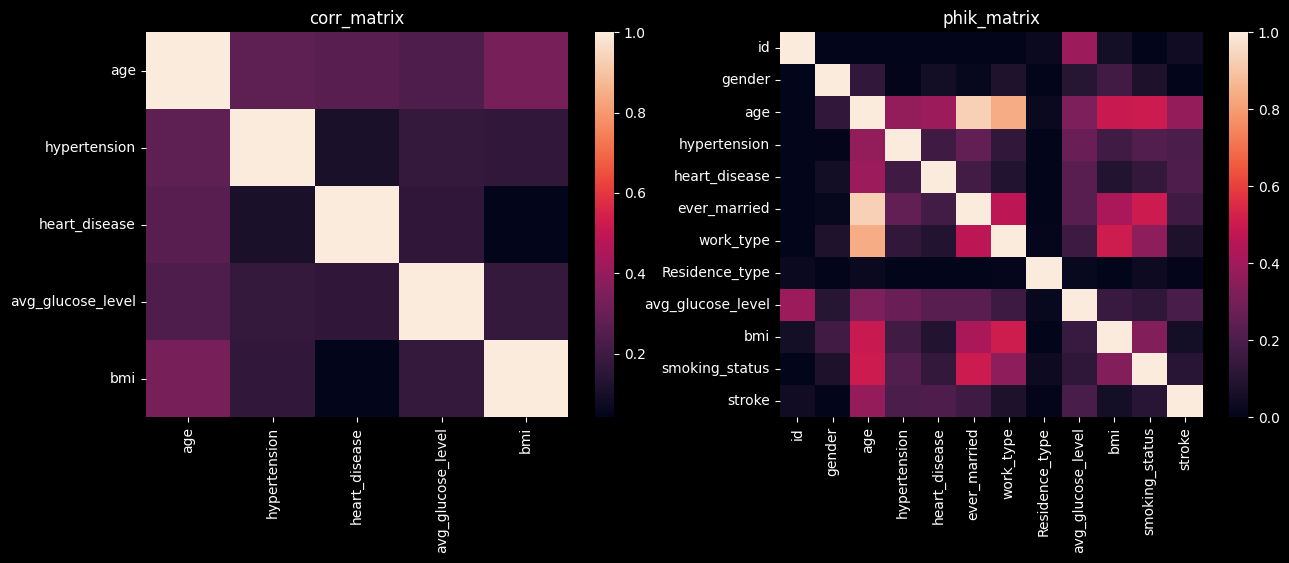

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']].corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

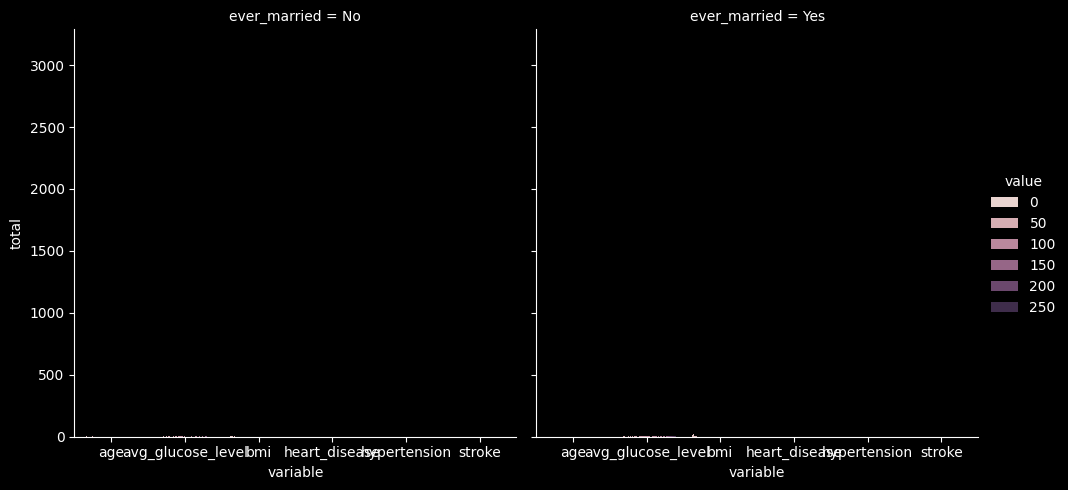

In [ ]:
df_for_cat=pd.melt(df, id_vars=['ever_married'], value_vars=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke'])
df_for_cat=df_for_cat.groupby(['ever_married', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='ever_married', kind='bar').fig
plt.show()

## DF_8

In [ ]:
! gdown --id 1x4h6BnCcKguvj56ExXpfyzVdT95Vs0pg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1x4h6BnCcKguvj56ExXpfyzVdT95Vs0pg
To: /content/Cost_of_Living_and_Income_Extended.csv
100% 36.1k/36.1k [00:00<00:00, 49.5MB/s]


In [ ]:
df=pd.read_csv('/content/Cost_of_Living_and_Income_Extended.csv')

In [ ]:
df

Country  Year  Average_Monthly_Income  Cost_of_Living  \
0        Australia  2013                 3483.92         1106.07   
1            India  2019                 7771.03         5422.78   
2           Russia  2004                 6991.30         3972.36   
3     South Africa  2011                 6628.04         6755.75   
4           Brazil  2015                 2434.27         2656.36   
..             ...   ...                     ...             ...   
495         Canada  2007                 5238.60         6129.17   
496         France  2004                 2448.53         5719.11   
497         Mexico  2003                 5255.04         5614.20   
498         Brazil  2023                 4549.89         2410.88   
499  United States  2005                 6348.84          934.07   

     Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
0                      32.09     27.50                1.74   
1                      25.21     29.30                3.35   
2                      40.85     22.94               15.48   
3                      30.38     15.69                8.03   
4                      49.27     12.44               25.06   
..                       ...       ...                 ...   
495                    25.25     29.96                4.78   
496                    45.67     11.97                4.81   
497                    26.82     36.16                2.11   
498                    45.11     15.06                5.57   
499                    28.38     17.87               19.93   

     Healthcare_Cost_Percentage  Education_Cost_Percentage  \
0                         18.23                       6.94   
1                         17.21                      12.42   
2                         15.28                       7.10   
3                          6.66                      11.76   
4                          9.34                       3.63   
..                          ...                        ...   
495                       15.87                       7.77   
496                        6.67                       8.91   
497                       14.12                      13.36   
498                        9.22                      14.94   
499                        7.60                       9.58   

     Transportation_Cost_Percentage         Region  
0                             17.19        Oceania  
1                              9.90           Asia  
2                              9.59         Europe  
3                             11.04         Africa  
4                             15.09  South America  
..                              ...            ...  
495                           15.88  North America  
496                            6.69         Europe  
497                           11.12  North America  
498                           18.30  South America  
499                            5.71  North America  

[500 rows x 11 columns]

In [ ]:
df.describe(include='all')

Country         Year  Average_Monthly_Income  Cost_of_Living  \
count      500   500.000000              500.000000       500.00000   
unique      12          NaN                     NaN             NaN   
top     Mexico          NaN                     NaN             NaN   
freq        56          NaN                     NaN             NaN   
mean       NaN  2011.514000             4291.248240      3716.23212   
std        NaN     7.018284             2179.217333      1922.16053   
min        NaN  2000.000000              534.740000       432.60000   
25%        NaN  2005.000000             2322.360000      1967.79000   
50%        NaN  2012.000000             4391.585000      3803.20500   
75%        NaN  2018.000000             6233.757500      5265.96750   
max        NaN  2023.000000             7984.510000      6996.13000   

        Housing_Cost_Percentage    Tax_Rate  Savings_Percentage  \
count                500.000000  500.000000           500.00000   
unique                      NaN         NaN                 NaN   
top                         NaN         NaN                 NaN   
freq                        NaN         NaN                 NaN   
mean                  34.973700   22.400900            14.92708   
std                    8.657032   10.025412             8.81321   
min                   20.100000    5.000000             0.00000   
25%                   27.235000   14.742500             7.52500   
50%                   35.170000   22.275000            14.95000   
75%                   42.567500   30.905000            22.42750   
max                   49.950000   39.920000            29.84000   

        Healthcare_Cost_Percentage  Education_Cost_Percentage  \
count                   500.000000                 500.000000   
unique                         NaN                        NaN   
top                            NaN                        NaN   
freq                           NaN                        NaN   
mean                     12.381820                   8.408440   
std                       4.269823                   3.775455   
min                       5.010000                   2.000000   
25%                       8.487500                   5.285000   
50%                      12.365000                   8.245000   
75%                      16.222500                  11.595000   
max                      19.990000                  14.940000   

        Transportation_Cost_Percentage         Region  
count                       500.000000            500  
unique                             NaN              6  
top                                NaN  North America  
freq                               NaN            145  
mean                         12.475940            NaN  
std                           4.219147            NaN  
min                           5.060000            NaN  
25%                           8.752500            NaN  
50%                          12.665000            NaN  
75%                          15.952500            NaN  
max                          19.970000            NaN

### Histogram

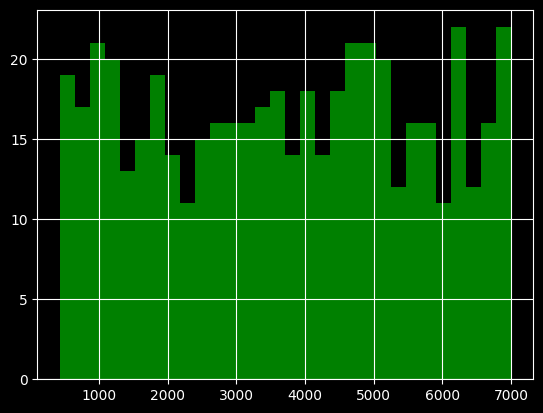

In [ ]:
fig, ax=plt.subplots()
df['Cost_of_Living'].hist(bins=30, ax=ax, color='g')
plt.show()

### KDE

In [ ]:
df['Country'].unique()

array(['Australia', 'India', 'Russia', 'South Africa', 'Brazil', 'China',
       'Japan', 'Canada', 'Germany', 'Mexico', 'United States', 'France'],
      dtype=object)

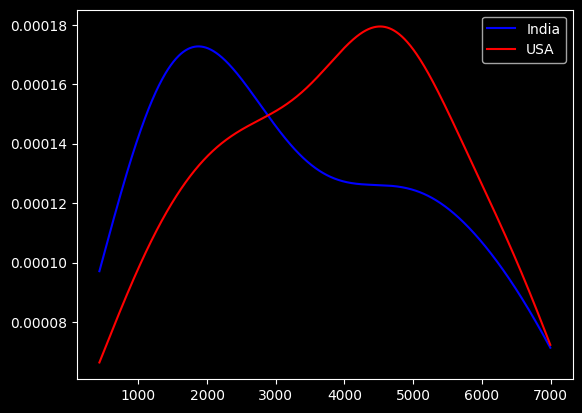

In [ ]:
kde_I=gaussian_kde(df[df['Country']=='India']['Cost_of_Living'], bw_method='silverman')
kde_U=gaussian_kde(df[df['Country']=='United States']['Cost_of_Living'], bw_method='silverman')
x=np.linspace(df['Cost_of_Living'].min(), df['Cost_of_Living'].max(), 1000)
fig, ax=plt.subplots()
ax.plot(x, kde_I(x), color='blue', label='India')
ax.plot(x, kde_U(x), color='red', label='USA')
ax.legend()
plt.show()

### Box plot

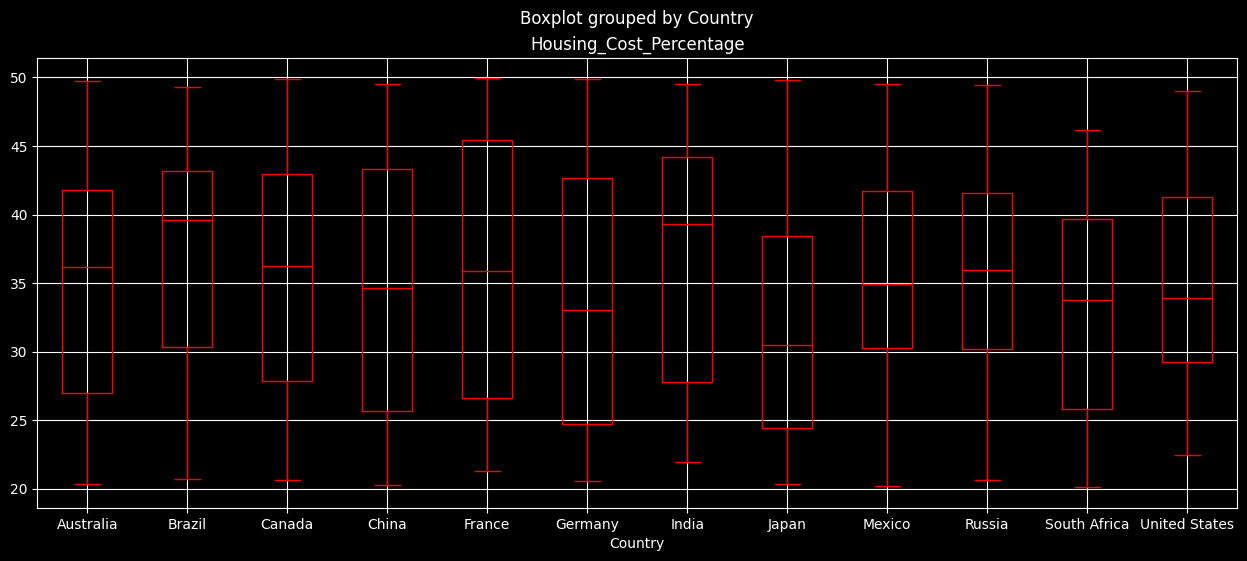

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
df.boxplot(column='Housing_Cost_Percentage', by='Country', color='red', ax=ax)
plt.show()

### Scatter plot

In [ ]:
df['Region'].unique()

array(['Oceania', 'Asia', 'Europe', 'Africa', 'South America',
       'North America'], dtype=object)

<ipython-input-157-8d332d30cb98>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['Region'].replace(color), ax=ax, diagonal='kde')


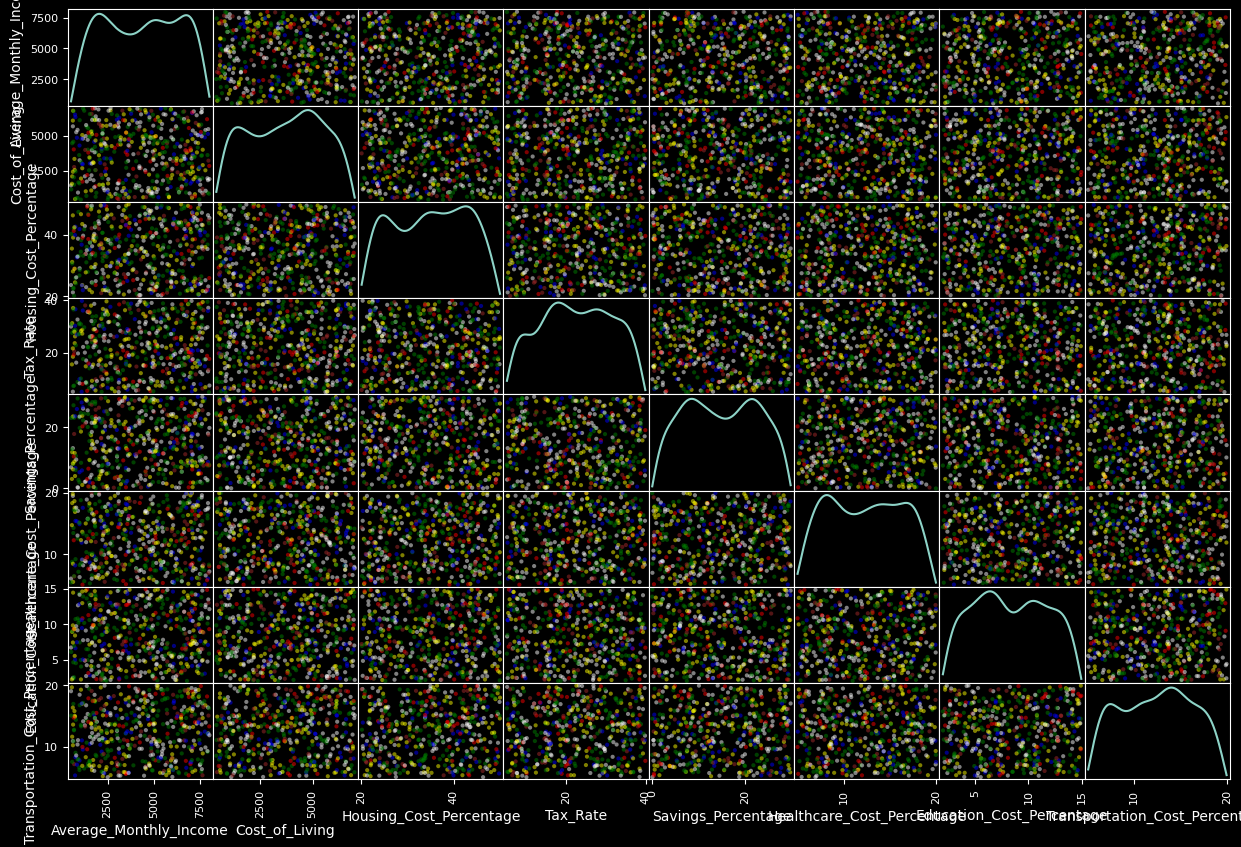

In [ ]:
df_for_scatter=df[['Region', 'Average_Monthly_Income', 'Cost_of_Living', 'Housing_Cost_Percentage',
                   'Tax_Rate', 'Savings_Percentage', 'Healthcare_Cost_Percentage', 'Education_Cost_Percentage',
                   'Transportation_Cost_Percentage']]
color={'Oceania': 'blue', 'Asia': 'white', 'Europe':'yellow', 'Africa': 'brown', 'South America': 'red', 'North America': 'green'}
fig, ax=plt.subplots(figsize=(15,10))
scatter_matrix(df_for_scatter, c=df_for_scatter['Region'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

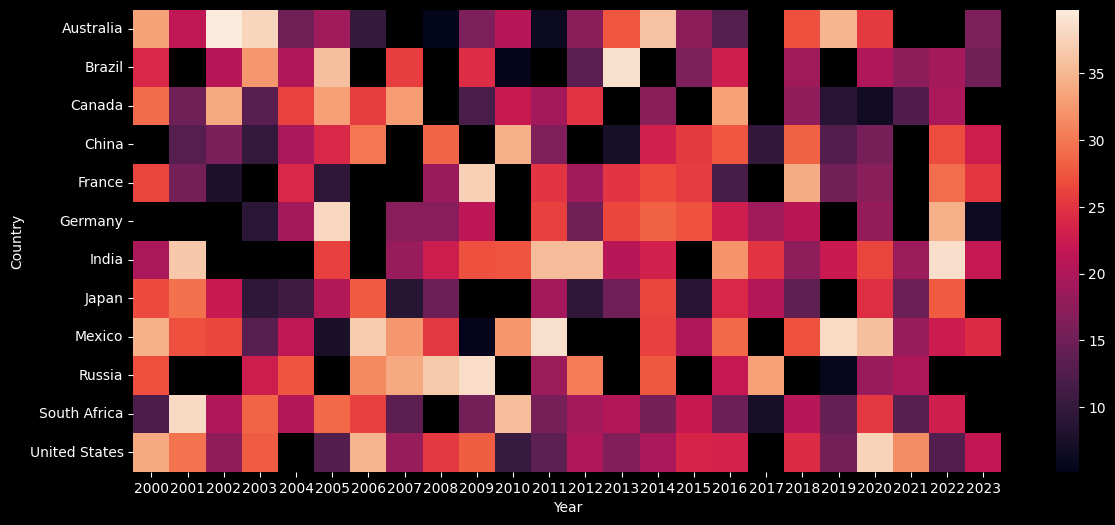

In [ ]:
fig, ax=plt.subplots(figsize=(14,6))
sns.heatmap(df.pivot_table(index='Country', columns=['Year'], values='Tax_Rate', aggfunc='median'), ax=ax)
plt.show()

interval columns not set, guessing: ['Year', 'Average_Monthly_Income', 'Cost_of_Living', 'Housing_Cost_Percentage', 'Tax_Rate', 'Savings_Percentage', 'Healthcare_Cost_Percentage', 'Education_Cost_Percentage', 'Transportation_Cost_Percentage']


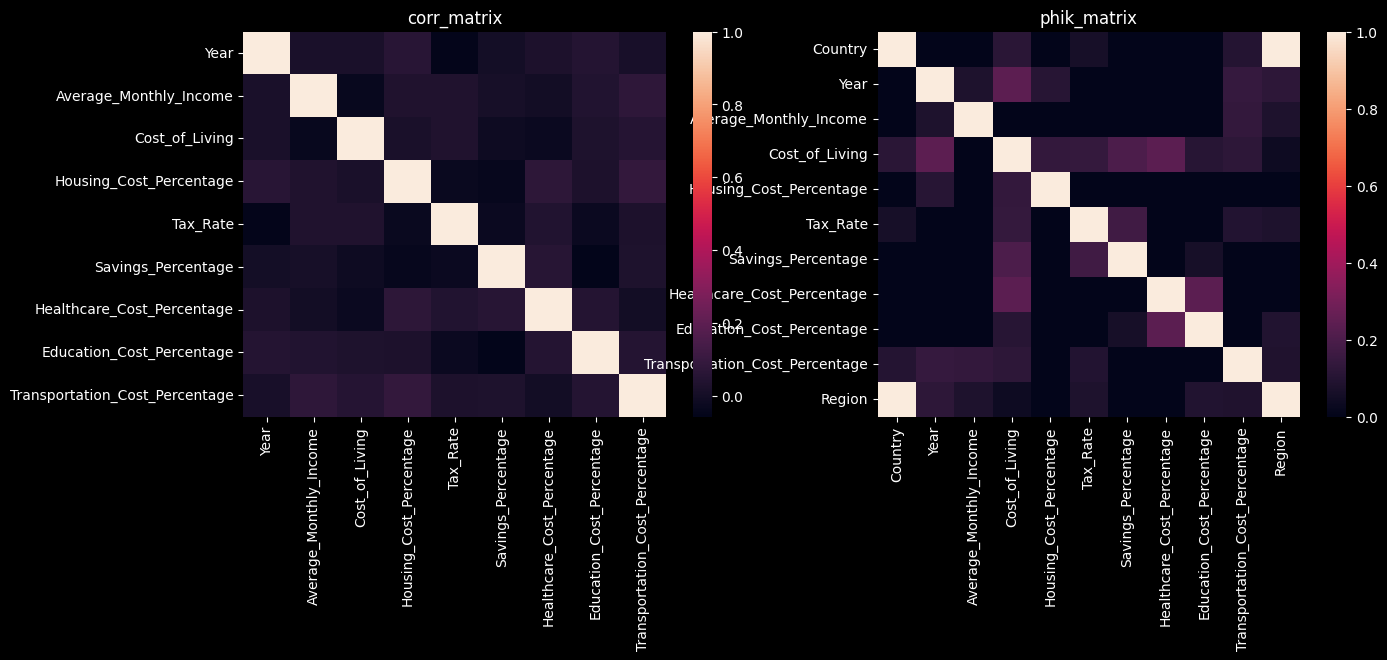

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df.drop(['Country', 'Region'], axis=1).corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

<ipython-input-175-8fc6acba4cce>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_for_cat=df_for_cat.groupby(['Year_period', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})


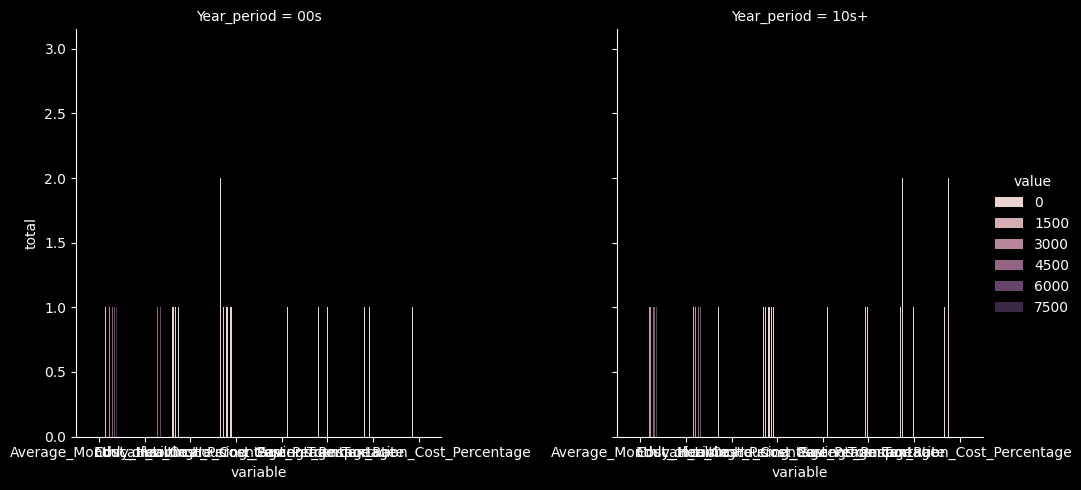

In [ ]:
df['Year_period']=pd.cut(df['Year'], bins=[0,2010, 3000], labels=['00s', '10s+'])
df_for_cat=pd.melt(df, id_vars=['Year_period'], value_vars=df.drop(['Country', 'Year', 'Region'], axis=1))
df_for_cat=df_for_cat.groupby(['Year_period', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='Year_period', kind='bar').fig
plt.show()

## DF_9

In [ ]:
! gdown --id 1mKROlKSjrVKGFEuJ8mJesr0gHXI2LZLs

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mKROlKSjrVKGFEuJ8mJesr0gHXI2LZLs
To: /content/train.csv.zip
100% 492k/492k [00:00<00:00, 31.2MB/s]


In [ ]:
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

In [ ]:
df.describe(include='all')

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
count   9800.000000            9800        9800        9800            9800   
unique          NaN            4922        1230        1326               4   
top             NaN  CA-2018-100111  05/09/2017  26/09/2018  Standard Class   
freq            NaN              14          38          34            5859   
mean    4900.500000             NaN         NaN         NaN             NaN   
std     2829.160653             NaN         NaN         NaN             NaN   
min        1.000000             NaN         NaN         NaN             NaN   
25%     2450.750000             NaN         NaN         NaN             NaN   
50%     4900.500000             NaN         NaN         NaN             NaN   
75%     7350.250000             NaN         NaN         NaN             NaN   
max     9800.000000             NaN         NaN         NaN             NaN   

       Customer ID  Customer Name   Segment        Country           City  \
count         9800           9800      9800           9800           9800   
unique         793            793         3              1            529   
top       WB-21850  William Brown  Consumer  United States  New York City   
freq            35             35      5101           9800            891   
mean           NaN            NaN       NaN            NaN            NaN   
std            NaN            NaN       NaN            NaN            NaN   
min            NaN            NaN       NaN            NaN            NaN   
25%            NaN            NaN       NaN            NaN            NaN   
50%            NaN            NaN       NaN            NaN            NaN   
75%            NaN            NaN       NaN            NaN            NaN   
max            NaN            NaN       NaN            NaN            NaN   

             State   Postal Code Region       Product ID         Category  \
count         9800   9789.000000   9800             9800             9800   
unique          49           NaN      4             1861                3   
top     California           NaN   West  OFF-PA-10001970  Office Supplies   
freq          1946           NaN   3140               19             5909   
mean           NaN  55273.322403    NaN              NaN              NaN   
std            NaN  32041.223413    NaN              NaN              NaN   
min            NaN   1040.000000    NaN              NaN              NaN   
25%            NaN  23223.000000    NaN              NaN              NaN   
50%            NaN  58103.000000    NaN              NaN              NaN   
75%            NaN  90008.000000    NaN              NaN              NaN   
max            NaN  99301.000000    NaN              NaN              NaN   

       Sub-Category     Product Name         Sales  
count          9800             9800   9800.000000  
unique           17             1849           NaN  
top         Binders  Staple envelope           NaN  
freq           1492               47           NaN  
mean            NaN              NaN    230.769059  
std             NaN              NaN    626.651875  
min             NaN              NaN      0.444000  
25%             NaN              NaN     17.248000  
50%             NaN              NaN     54.490000  
75%             NaN              NaN    210.605000  
max             NaN              NaN  22638.480000

In [ ]:
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Order Date']=pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

### Histogram

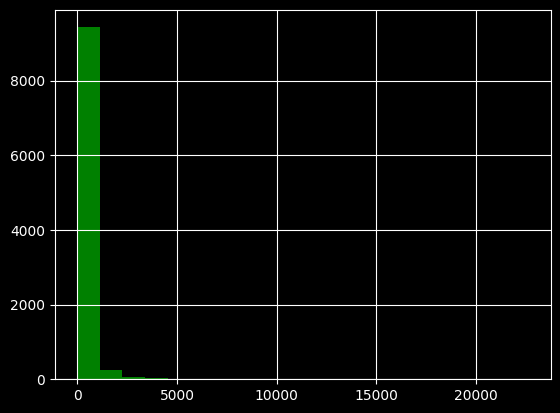

In [ ]:
fig, ax= plt.subplots()
df['Sales'].hist(bins=20, color='g', ax=ax)
plt.show()

### KDE

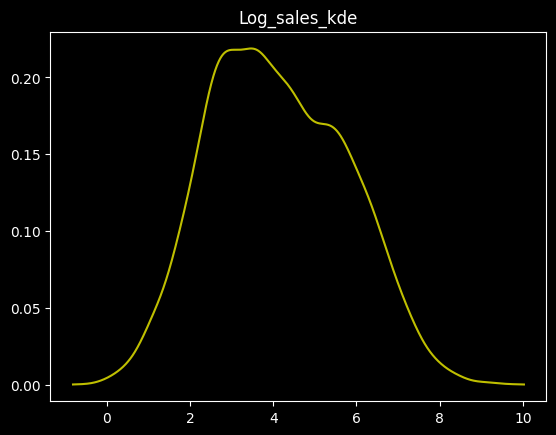

In [ ]:
df['Log_sales']=np.log(df['Sales'])
kde=gaussian_kde(df['Log_sales'], bw_method='silverman')
x=np.linspace(df['Log_sales'].min(), df['Log_sales'].max(), 1000)
fig, ax=plt.subplots()
ax.plot(x, kde(x), color='y')
ax.set_title('Log_sales_kde')
plt.show()

### Box plot

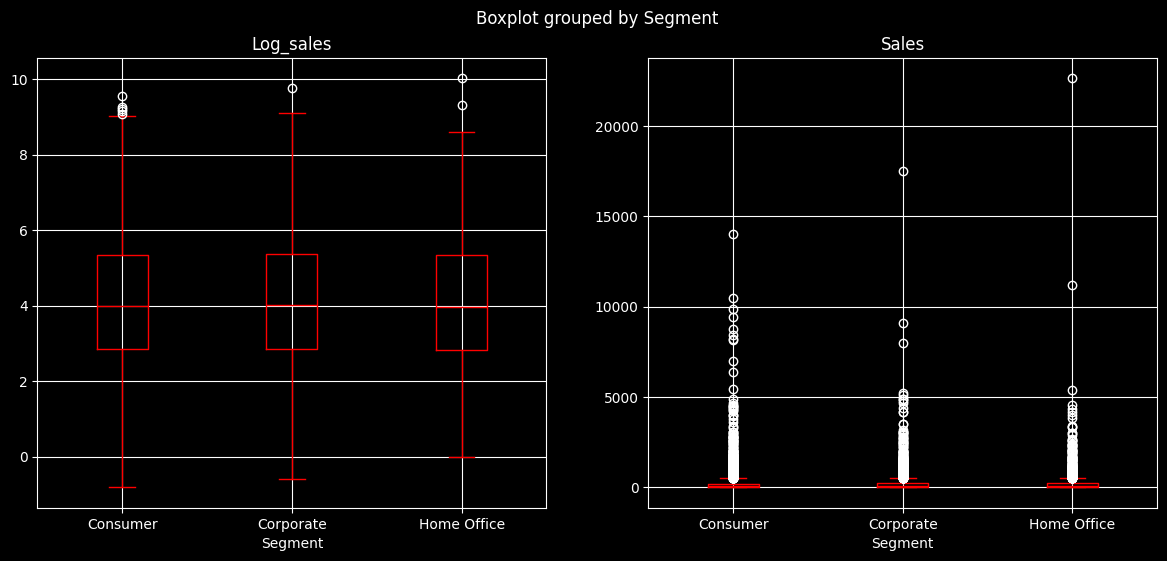

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(14,6))
df.boxplot(column='Log_sales', by='Segment', color='r', ax=axs[0])
axs[0].set_title('Log_sales')
df.boxplot(column='Sales', by='Segment', color='r', ax=axs[1])
axs[1].set_title('Sales')
plt.show()

### Scatter plot

In [ ]:
df['TBOS']=df['Ship Date']-df['Order Date']
df['TBOS']=df['TBOS'].dt.days

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<ipython-input-35-b01672ea8588>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['Category'].replace(color), ax=ax, diagonal='kde')


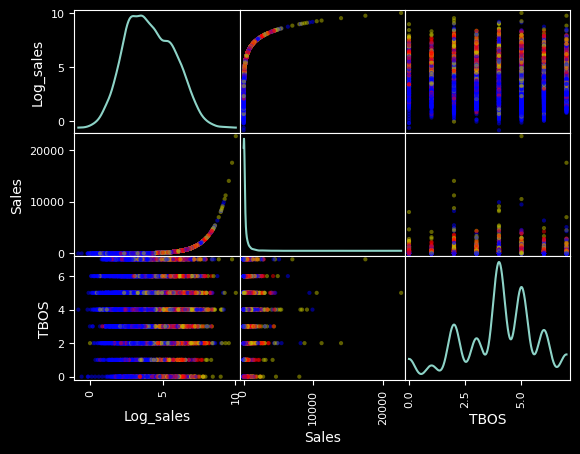

In [ ]:
df_for_scatter=df[['Category', 'Log_sales', 'Sales', 'TBOS']]
color={'Furniture': 'r', 'Office Supplies': 'b',  'Technology': 'y'}
fig, ax=plt.subplots()
scatter_matrix(df_for_scatter, c=df_for_scatter['Category'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

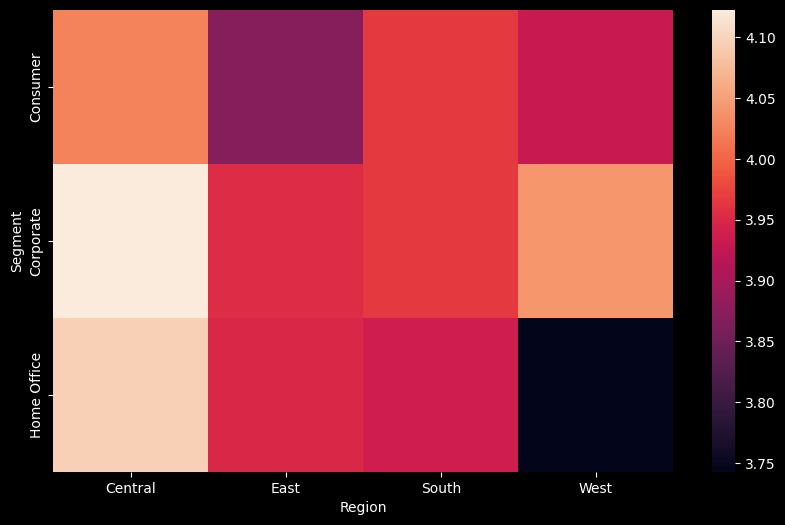

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.pivot_table(index='Segment', columns='Region', values='TBOS', aggfunc='mean'), ax=ax)
plt.show()

### Cat plot

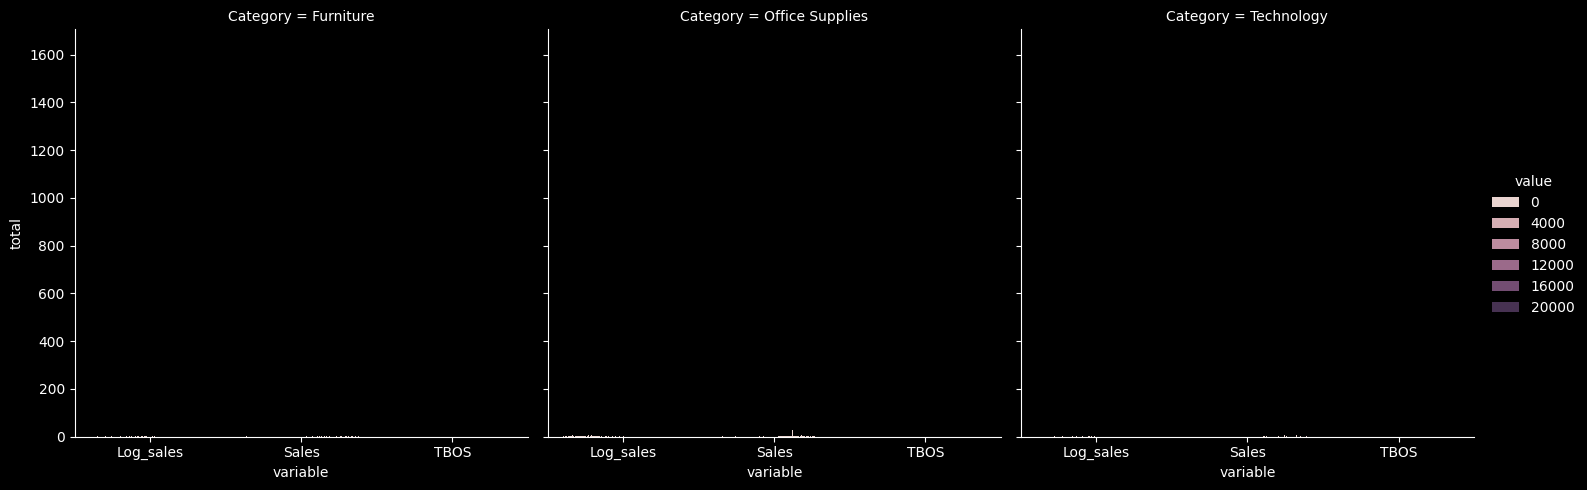

In [ ]:
df_for_cat=pd.melt(df, id_vars=['Category'], value_vars=['Sales', 'Log_sales', 'TBOS'])
df_for_cat=df_for_cat.groupby(['Category', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='Category', kind='bar').fig
plt.show()

## DF_10

In [ ]:
! gdown --id 1D4Tgb4p9SJiwUsjVqjnFlWZpgPbNKQgi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D4Tgb4p9SJiwUsjVqjnFlWZpgPbNKQgi
To: /content/avocado.csv.zip
100% 644k/644k [00:00<00:00, 31.8MB/s]


In [ ]:
! unzip /content/avocado.csv.zip

Archive:  /content/avocado.csv.zip
  inflating: avocado.csv             


In [ ]:
df=pd.read_csv('/content/avocado.csv')

In [ ]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [ ]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.describe(include='all')

Unnamed: 0                           Date  AveragePrice  \
count   18249.000000                          18249  18249.000000   
unique           NaN                            NaN           NaN   
top              NaN                            NaN           NaN   
freq             NaN                            NaN           NaN   
mean       24.232232  2016-08-13 23:30:43.498273792      1.405978   
min         0.000000            2015-01-04 00:00:00      0.440000   
25%        10.000000            2015-10-25 00:00:00      1.100000   
50%        24.000000            2016-08-14 00:00:00      1.370000   
75%        38.000000            2017-06-04 00:00:00      1.660000   
max        52.000000            2018-03-25 00:00:00      3.250000   
std        15.481045                            NaN      0.402677   

        Total Volume          4046          4225          4770    Total Bags  \
count   1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05   
min     8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00  5.088640e+03   
50%     1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02  3.974383e+04   
75%     4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03  1.107834e+05   
max     6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06  1.937313e+07   
std     3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05  9.862424e+05   

          Small Bags    Large Bags    XLarge Bags          type          year  \
count   1.824900e+04  1.824900e+04   18249.000000         18249  18249.000000   
unique           NaN           NaN            NaN             2           NaN   
top              NaN           NaN            NaN  conventional           NaN   
freq             NaN           NaN            NaN          9126           NaN   
mean    1.821947e+05  5.433809e+04    3106.426507           NaN   2016.147899   
min     0.000000e+00  0.000000e+00       0.000000           NaN   2015.000000   
25%     2.849420e+03  1.274700e+02       0.000000           NaN   2015.000000   
50%     2.636282e+04  2.647710e+03       0.000000           NaN   2016.000000   
75%     8.333767e+04  2.202925e+04     132.500000           NaN   2017.000000   
max     1.338459e+07  5.719097e+06  551693.650000           NaN   2018.000000   
std     7.461785e+05  2.439660e+05   17692.894652           NaN      0.939938   

        region  
count    18249  
unique      54  
top     Albany  
freq       338  
mean       NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN  
std        NaN

### Histogarm

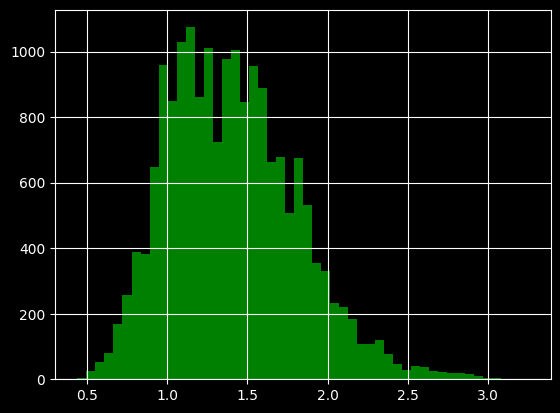

In [ ]:
fig, ax=plt.subplots()
df['AveragePrice'].hist(bins=50, color='g', ax=ax)
plt.show()

### KDE

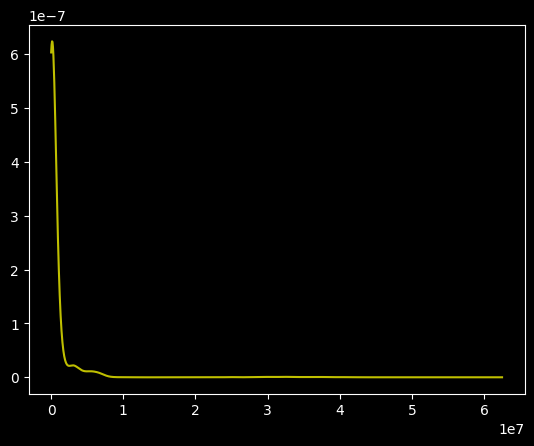

In [ ]:
kde=gaussian_kde(df['Total Volume'], bw_method='silverman')
x=np.linspace(df['Total Volume'].min(), df['Total Volume'].max(), 1000)
fig, ax=plt.subplots()
ax.plot(x, kde(x), color='y')
plt.show()

### Box plot

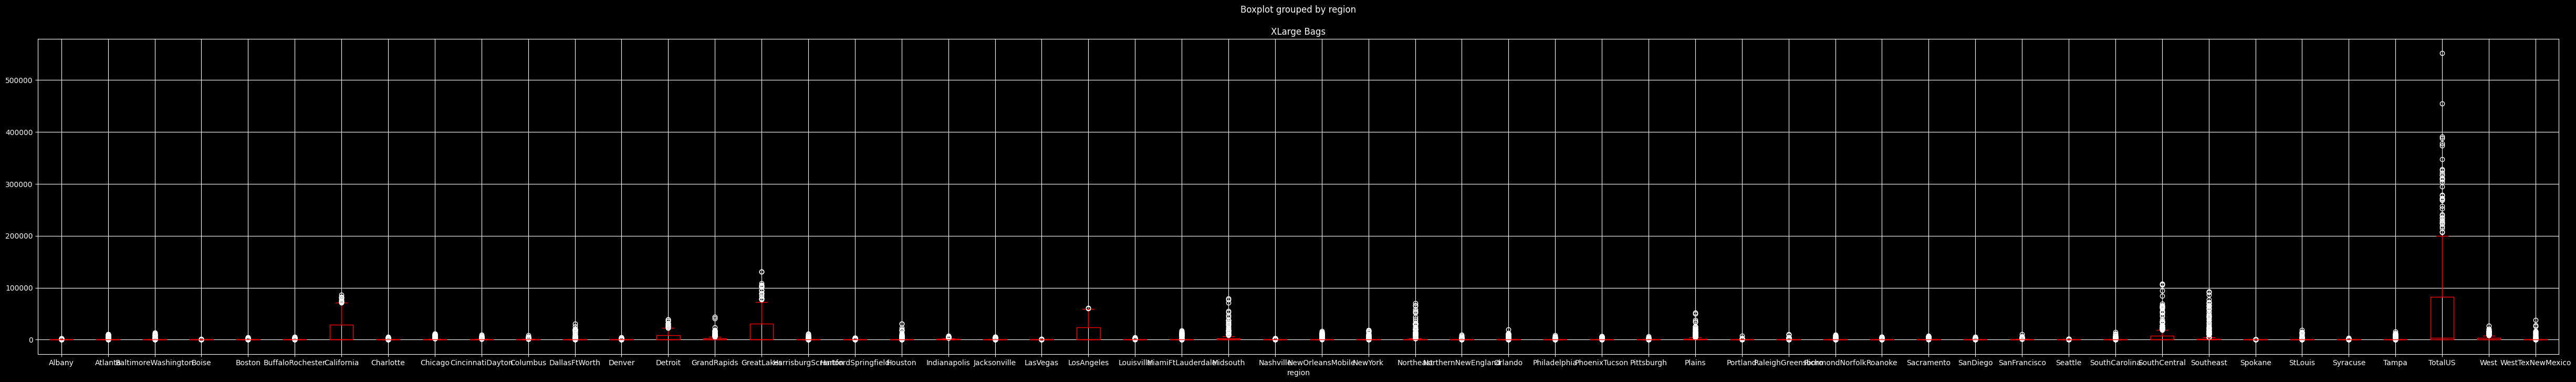

In [ ]:
fig, ax= plt.subplots(figsize=(60,8))
df.boxplot(column='XLarge Bags', by='region', color='r', ax=ax)
plt.show()

### Scatter plot

In [ ]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

<ipython-input-40-40dfbcac14e5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df_for_scatter, c=df_for_scatter['type'].replace(color), ax=ax, diagonal='kde')


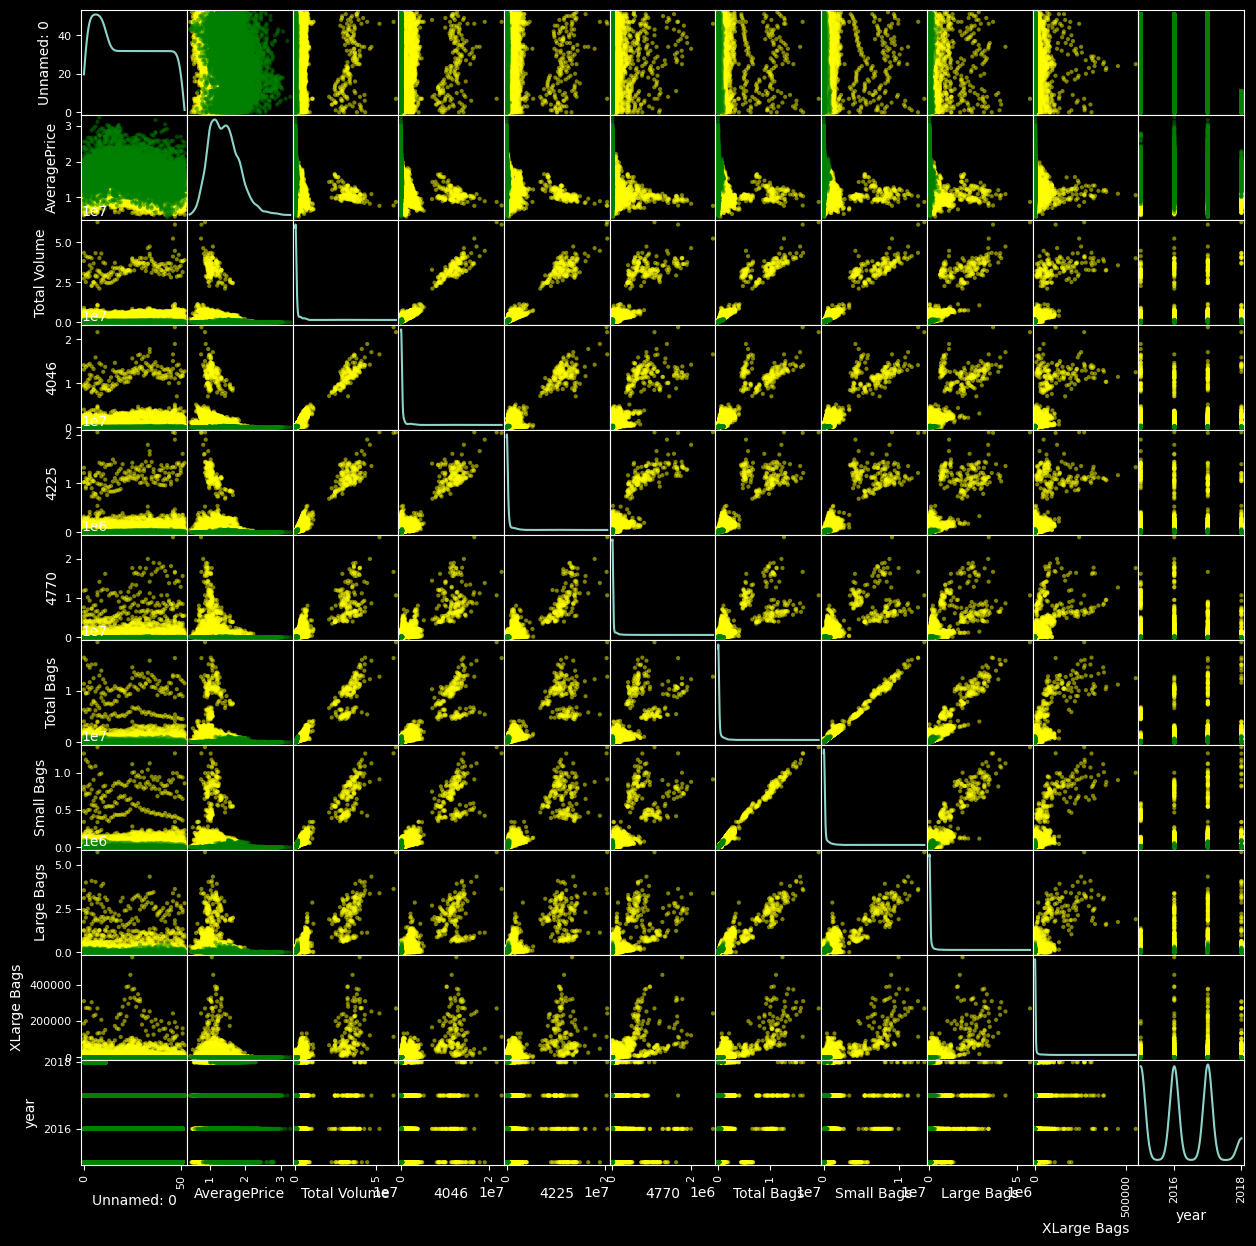

In [ ]:
df_for_scatter=df.drop(['Date', 'region'], axis=1)
color={'conventional': 'yellow', 'organic': 'green'}
fig, ax=plt.subplots(figsize=(15, 15))
scatter_matrix(df_for_scatter, c=df_for_scatter['type'].replace(color), ax=ax, diagonal='kde')
plt.show()

### Heatmap

interval columns not set, guessing: ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


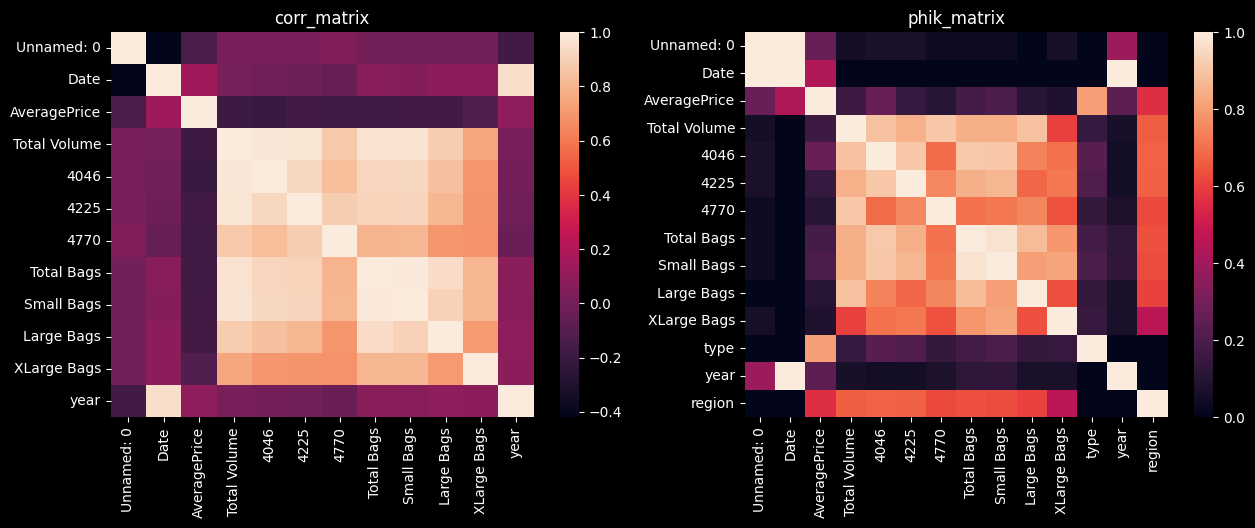

In [ ]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
sns.heatmap(df.drop(['type', 'region'], axis=1).corr(), ax=axs[0])
axs[0].set_title('corr_matrix')
sns.heatmap(df.phik_matrix(), ax=axs[1])
axs[1].set_title('phik_matrix')
plt.show()

### Cat plot

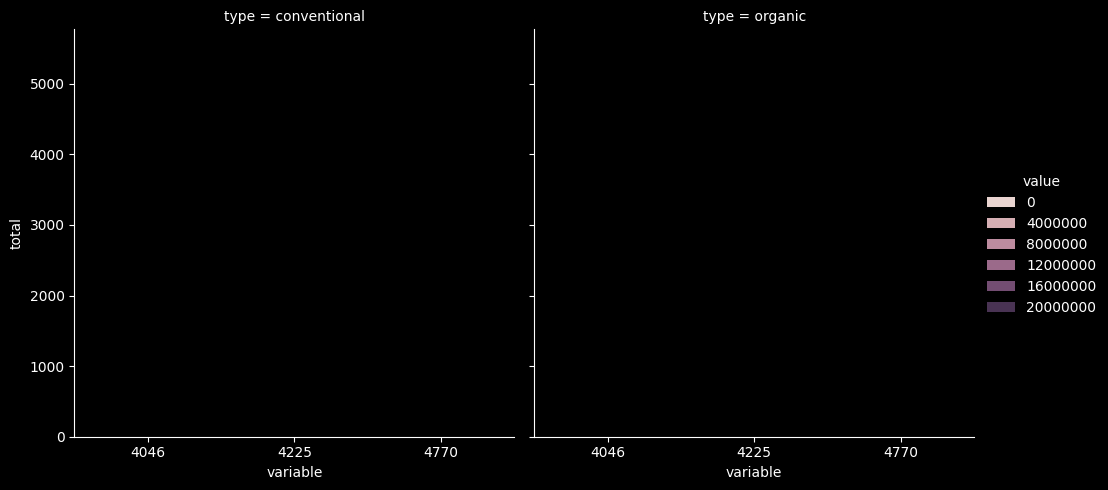

In [ ]:
df_for_cat=pd.melt(df, id_vars='type', value_vars=['4046', '4225', '4770'])
df_for_cat=df_for_cat.groupby(['type', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})
fig=sns.catplot(df_for_cat, x='variable', y='total', hue='value', col='type', kind='bar').fig
plt.show()